In [ ]:
# Se instala la biblioteca PySpark utilizando el comando "!pip install".
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=2e4f6aafa35822d5d39347f5f7f7eeeaf91b385bf64788de38769db3fcafcfb1
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


#Se importan librerias

In [ ]:
# Se importa la biblioteca pandas y se le asigna el alias 'pd'.
import pandas as pd

# Se importa la biblioteca numpy y se le asigna el alias 'np'.
import numpy as np

# Se importan las bibliotecas seaborn y matplotlib.pyplot para la visualización de datos.
import seaborn as sns
import matplotlib.pyplot as plt

#Se crea la sesión Spark

In [ ]:
# Se importan las clases SparkSession y SQLContext del módulo pyspark.sql.
from pyspark.sql import SparkSession, SQLContext

In [ ]:
# Se crea una instancia de SparkSession con la configuración específica.
# El modo "local[*]" indica que Spark se ejecutará en modo local utilizando todos los núcleos disponibles.
# El nombre de la aplicación se establece como "Proyecto8".
spark = SparkSession.builder.master("local[*]").appName("Proyecto8").getOrCreate()

In [ ]:
spark

In [ ]:
# Se crea la variable 'sc' que almacena el contexto de Spark asociado a la instancia de SparkSession previamente creada.
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=Proyecto8>

#Se cargan los datos

Más información en: https://www.kaggle.com/datasets/ihormuliar/starbucks-customer-data/data?select=transcript.csv

In [ ]:
# Lee el archivo CSV "portfolio.csv" y carga los datos en un DataFrame de Spark
spark_df1 = spark.read.csv(path="/content/portfolio.csv", inferSchema= True, header = True)
spark_df2 = spark.read.csv(path="/content/profile.csv", inferSchema= True, header = True)
spark_df3 = spark.read.csv(path="/content/transcript.csv", inferSchema= True, header = True)

#Se visualiza la estructura de los datos

In [ ]:
# Se utiliza el método 'show(5)' para mostrar las primeras 5 filas del DataFrame 'spark_df1'.
spark_df1.show(5)

+---+------+--------------------+----------+--------+-------------+--------------------+
|_c0|reward|            channels|difficulty|duration|   offer_type|                  id|
+---+------+--------------------+----------+--------+-------------+--------------------+
|  0|    10|['email', 'mobile...|        10|       7|         bogo|ae264e3637204a6fb...|
|  1|    10|['web', 'email', ...|        10|       5|         bogo|4d5c57ea9a6940dd8...|
|  2|     0|['web', 'email', ...|         0|       4|informational|3f207df678b143eea...|
|  3|     5|['web', 'email', ...|         5|       7|         bogo|9b98b8c7a33c4b65b...|
|  4|     5|    ['web', 'email']|        20|      10|     discount|0b1e1539f2cc45b7b...|
+---+------+--------------------+----------+--------+-------------+--------------------+
only showing top 5 rows



In [ ]:
# Se utiliza el método 'show(5)' para mostrar las primeras 5 filas del DataFrame 'spark_df2'.
spark_df2.show(5)

+---+------+---+--------------------+----------------+--------+
|_c0|gender|age|                  id|became_member_on|  income|
+---+------+---+--------------------+----------------+--------+
|  0|  NULL|118|68be06ca386d4c319...|        20170212|    NULL|
|  1|     F| 55|0610b486422d4921a...|        20170715|112000.0|
|  2|  NULL|118|38fe809add3b4fcf9...|        20180712|    NULL|
|  3|     F| 75|78afa995795e4d85b...|        20170509|100000.0|
|  4|  NULL|118|a03223e636434f42a...|        20170804|    NULL|
+---+------+---+--------------------+----------------+--------+
only showing top 5 rows



In [ ]:
# Se utiliza el método 'show(5)' para mostrar las primeras 5 filas del DataFrame 'spark_df3'.
spark_df3.show(5)

+---+--------------------+--------------+--------------------+----+
|_c0|              person|         event|               value|time|
+---+--------------------+--------------+--------------------+----+
|  0|78afa995795e4d85b...|offer received|{'offer id': '9b9...|   0|
|  1|a03223e636434f42a...|offer received|{'offer id': '0b1...|   0|
|  2|e2127556f4f64592b...|offer received|{'offer id': '290...|   0|
|  3|8ec6ce2a7e7949b1b...|offer received|{'offer id': 'faf...|   0|
|  4|68617ca6246f4fbc8...|offer received|{'offer id': '4d5...|   0|
+---+--------------------+--------------+--------------------+----+
only showing top 5 rows



In [ ]:
# Se utiliza el método 'printSchema()' para imprimir el esquema del DataFrame 'spark_df1'.
spark_df1.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- reward: integer (nullable = true)
 |-- channels: string (nullable = true)
 |-- difficulty: integer (nullable = true)
 |-- duration: integer (nullable = true)
 |-- offer_type: string (nullable = true)
 |-- id: string (nullable = true)



In [ ]:
# Se utiliza el método 'printSchema()' para imprimir el esquema del DataFrame 'spark_df2'.
spark_df2.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- became_member_on: integer (nullable = true)
 |-- income: double (nullable = true)



In [ ]:
# Se utiliza el método 'printSchema()' para imprimir el esquema del DataFrame 'spark_df3'.
spark_df3.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- person: string (nullable = true)
 |-- event: string (nullable = true)
 |-- value: string (nullable = true)
 |-- time: integer (nullable = true)



In [ ]:
# Se utiliza el método 'describe()' para obtener estadísticas descriptivas del DataFrame 'spark_df2' y luego se muestra el resultado.
spark_df2.describe().show()

+-------+-----------------+------+------------------+--------------------+--------------------+------------------+
|summary|              _c0|gender|               age|                  id|    became_member_on|            income|
+-------+-----------------+------+------------------+--------------------+--------------------+------------------+
|  count|            17000| 14825|             17000|               17000|               17000|             14825|
|   mean|           8499.5|  NULL| 62.53141176470588|2.565638242424101E31|2.0167034234117646E7|  65404.9915682968|
| stddev|4907.621623556567|  NULL|26.738579945767256|                NULL|  11677.499960793006|21598.299410229436|
|    min|                0|     F|                18|0009655768c64bdeb...|            20130729|           30000.0|
|    max|            16999|     O|               118|ffff82501cea40309...|            20180726|          120000.0|
+-------+-----------------+------+------------------+--------------------+------

#Consultas SQL

In [ ]:
# Se importa el módulo pyspark.sql y se le asigna el alias 'sparksql'.
import pyspark.sql as sparksql

In [ ]:
# Crea una vista temporal llamada 'table1' para el DataFrame spark_df1
spark_df1.createOrReplaceTempView('table1')

In [ ]:
# Crea una vista temporal llamada 'table2' para el DataFrame spark_df2
spark_df2.createOrReplaceTempView('table2')

In [ ]:
# Crea una vista temporal llamada 'table3' para el DataFrame spark_df3
spark_df3.createOrReplaceTempView('table3')

In [ ]:
# Crea un nuevo DataFrame Spark llamado df_ofertas_completadas mediante una consulta SQL
df_ofertas_completadas = spark.sql(" \
    SELECT person, value, COUNT(*) AS Oferta_Completada \
    FROM table3 \
    WHERE event = 'offer completed' \
    GROUP BY person, value \
    ORDER BY COUNT(*) DESC \
")

In [ ]:
df_ofertas_completadas.show(5)

+--------------------+--------------------+-----------------+
|              person|               value|Oferta_Completada|
+--------------------+--------------------+-----------------+
|c93f9619abd642a68...|{'offer_id': '4d5...|                4|
|948ec827ac334c878...|{'offer_id': 'ae2...|                4|
|ad84e9ec3c33444c8...|{'offer_id': '4d5...|                4|
|073fce5708884b30a...|{'offer_id': '9b9...|                4|
|ea54840ba8a54a098...|{'offer_id': '229...|                4|
+--------------------+--------------------+-----------------+
only showing top 5 rows



In [ ]:
# Lista de ofertas
Ofertas = ["{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}",
 "{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2', 'reward': 3}",
 "{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'reward': 5}",
 "{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}",
 "{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}",
 "{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd', 'reward': 10}",
 "{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7', 'reward': 5}",
 "{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0', 'reward': 10}"]

In [ ]:
import pyspark.sql.functions as F

In [ ]:
# Inicializar contador para el nombre de la columna
contador_columna = 1

# Iterar a través de las Ofertas
for oferta in Ofertas:
    # Crear nueva columna con el nombre 'OfertaX' donde X es el valor del contador
    df_ofertas_completadas = df_ofertas_completadas.withColumn(
        f'Oferta{contador_columna}',
        F.when(
            df_ofertas_completadas.value == oferta,
            df_ofertas_completadas.Oferta_Completada
        ).otherwise(0)
    )

    # Incrementar el contador
    contador_columna += 1

In [ ]:
# Crea una vista temporal llamada 'table4' para el DataFrame df_ofertas_completadas
df_ofertas_completadas.createOrReplaceTempView('table4')

In [ ]:
consulta_sql = (
    "SELECT person, "
    "       SUM(Oferta_Completada) AS Ofertas_Completadas, "
    "       SUM(Oferta1), "
    "       SUM(Oferta2), "
    "       SUM(Oferta3), "
    "       SUM(Oferta4), "
    "       SUM(Oferta5), "
    "       SUM(Oferta6), "
    "       SUM(Oferta7), "
    "       SUM(Oferta8) "
    "FROM table4 "
    "GROUP BY person"
)

# Ejecutar la consulta SQL en Spark
spark.sql(consulta_sql).show()

+--------------------+-------------------+------------+------------+------------+------------+------------+------------+------------+------------+
|              person|Ofertas_Completadas|sum(Oferta1)|sum(Oferta2)|sum(Oferta3)|sum(Oferta4)|sum(Oferta5)|sum(Oferta6)|sum(Oferta7)|sum(Oferta8)|
+--------------------+-------------------+------------+------------+------------+------------+------------+------------+------------+------------+
|a5eb8d8f9d90410fa...|                  5|           1|           2|           1|           0|           0|           1|           0|           0|
|793a91c8f72d45029...|                  5|           0|           0|           1|           0|           3|           0|           1|           0|
|d7fec020017649a7a...|                  4|           2|           1|           1|           0|           0|           0|           0|           0|
|8fecd95fe7b54cc2a...|                  3|           0|           0|           1|           0|           1|           

In [ ]:
# Creación de un nuevo DataFrame con la agregación de las ofertas completadas
df_ofertas_completadas2 = spark.sql(" \
    SELECT person, \
           SUM(Oferta_Completada) AS Ofertas_Completadas, \
           SUM(Oferta1) AS Oferta1, \
           SUM(Oferta2) AS Oferta2, \
           SUM(Oferta3) AS Oferta3, \
           SUM(Oferta4) AS Oferta4, \
           SUM(Oferta5) AS Oferta5, \
           SUM(Oferta6) AS Oferta6, \
           SUM(Oferta7) AS Oferta7, \
           SUM(Oferta8) AS Oferta8 \
    FROM table4 \
    GROUP BY person \
")

In [ ]:
# Creación de un DataFrame con la cuenta total de ofertas recibidas por persona
df_recibidas_totales = spark.sql(" \
    SELECT person, COUNT(*) AS Ofertas_recibidas \
    FROM table3 \
    WHERE event = 'offer received' \
    GROUP BY person \
    ORDER BY COUNT(*) DESC \
")

In [ ]:
# Realiza un join entre los DataFrames df_recibidas_totales y df_ofertas_completadas2
df_unido = df_recibidas_totales.join(df_ofertas_completadas2, on="person", how="full")

In [ ]:
df_unido.show(5)

+--------------------+-----------------+-------------------+-------+-------+-------+-------+-------+-------+-------+-------+
|              person|Ofertas_recibidas|Ofertas_Completadas|Oferta1|Oferta2|Oferta3|Oferta4|Oferta5|Oferta6|Oferta7|Oferta8|
+--------------------+-----------------+-------------------+-------+-------+-------+-------+-------+-------+-------+-------+
|0009655768c64bdeb...|                5|                  3|      1|      0|      0|      1|      1|      0|      0|      0|
|00116118485d4dfda...|                2|               NULL|   NULL|   NULL|   NULL|   NULL|   NULL|   NULL|   NULL|   NULL|
|0011e0d4e6b944f99...|                5|                  3|      0|      1|      1|      0|      0|      0|      1|      0|
|0020c2b971eb4e918...|                5|                  3|      2|      0|      0|      0|      0|      0|      0|      1|
|0020ccbbb6d84e358...|                4|                  3|      0|      1|      1|      1|      0|      0|      0|      0|


In [ ]:
# Rellena los valores nulos en el DataFrame df_unido con ceros
df_unido = df_unido.fillna(0)

In [ ]:
# Muestra el contenido del DataFrame df_unido
df_unido.show()

+--------------------+-----------------+-------------------+-------+-------+-------+-------+-------+-------+-------+-------+
|              person|Ofertas_recibidas|Ofertas_Completadas|Oferta1|Oferta2|Oferta3|Oferta4|Oferta5|Oferta6|Oferta7|Oferta8|
+--------------------+-----------------+-------------------+-------+-------+-------+-------+-------+-------+-------+-------+
|0009655768c64bdeb...|                5|                  3|      1|      0|      0|      1|      1|      0|      0|      0|
|00116118485d4dfda...|                2|                  0|      0|      0|      0|      0|      0|      0|      0|      0|
|0011e0d4e6b944f99...|                5|                  3|      0|      1|      1|      0|      0|      0|      1|      0|
|0020c2b971eb4e918...|                5|                  3|      2|      0|      0|      0|      0|      0|      0|      1|
|0020ccbbb6d84e358...|                4|                  3|      0|      1|      1|      1|      0|      0|      0|      0|


In [ ]:
# Se obtiene el número total de filas en el DataFrame df_unido
df_unido.count()

16994

##Se crea un nuevo dataframe

In [ ]:
consulta_sql = (
    "SELECT "
    "    person, "
    "    COUNT(value) AS transacciones, "
    "    SUM(SUBSTRING(value, LOCATE(':', value) + 2, LOCATE('}', value) - LOCATE(':', value) - 2)) AS total_value "
    "FROM "
    "    table3 "
    "WHERE "
    "    event = 'transaction' "
    "GROUP BY "
    "    person"
)

# Mostrar los primeros 5 resultados de la consulta SQL en Spark
spark.sql(consulta_sql).show(5)

+--------------------+-------------+------------------+
|              person|transacciones|       total_value|
+--------------------+-------------+------------------+
|08579355f46b49efa...|            6|            134.99|
|708d8271f758417e9...|           14|59.989999999999995|
|dd1069bbc7ef423c9...|           19|61.120000000000005|
|9da3f2339b244229a...|            4|             18.87|
|30105215903d4eefb...|           12|139.85000000000002|
+--------------------+-------------+------------------+
only showing top 5 rows



In [ ]:
consulta_sql = (
    "SELECT "
    "    gender, "
    "    age, "
    "    id, "
    "    became_member_on, "
    "    income, "
    "    value AS total_value, "
    "    frecuencia AS transacciones "
    "FROM "
    "    table2 "
    "LEFT JOIN "
    "    (SELECT "
    "        person, "
    "        COUNT(value) AS frecuencia, "
    "        SUM(SUBSTRING(value, LOCATE(':', value) + 2, LOCATE('}', value) - LOCATE(':', value) - 2)) AS value "
    "    FROM "
    "        table3 "
    "    WHERE "
    "        event = 'transaction' "
    "    GROUP BY "
    "        person) AS table5 "
    "ON "
    "    table2.id = table5.person"
)

# Mostrar los primeros 5 resultados de la consulta SQL en Spark
spark.sql(consulta_sql).show(5)

+------+---+--------------------+----------------+--------+------------------+-------------+
|gender|age|                  id|became_member_on|  income|       total_value|transacciones|
+------+---+--------------------+----------------+--------+------------------+-------------+
|  NULL|118|38fe809add3b4fcf9...|        20180712|    NULL|              14.3|            6|
|     F| 75|78afa995795e4d85b...|        20170509|100000.0|            159.27|            7|
|  NULL|118|68be06ca386d4c319...|        20170212|    NULL|              20.4|            9|
|  NULL|118|a03223e636434f42a...|        20170804|    NULL|4.6499999999999995|            3|
|     M| 68|e2127556f4f64592b...|        20180426| 70000.0|57.730000000000004|            3|
+------+---+--------------------+----------------+--------+------------------+-------------+
only showing top 5 rows



In [ ]:
# Realiza una consulta SQL en Spark para seleccionar columnas específicas de las tablas 'table2' y 'table3' y realiza un left join.
consulta_sql = (
    "SELECT "
    "    gender, "
    "    age, "
    "    id, "
    "    became_member_on, "
    "    income, "
    "    value AS total_value, "
    "    frecuencia AS transacciones "
    "FROM "
    "    table2 "
    "LEFT JOIN "
    "    (SELECT "
    "        person, "
    "        COUNT(value) AS frecuencia, "
    "        SUM(SUBSTRING(value, LOCATE(':', value) + 2, LOCATE('}', value) - LOCATE(':', value) - 2)) AS value "
    "    FROM "
    "        table3 "
    "    WHERE "
    "        event = 'transaction' "
    "    GROUP BY "
    "        person) AS table5 "
    "ON "
    "    table2.id = table5.person"
)

# Crear DataFrame usando la consulta SQL
Mdf = spark.sql(consulta_sql)

In [ ]:
# Agrega una nueva columna llamada "became_member_on_formateada" al DataFrame Mdf
Mdf = Mdf.withColumn(
    "became_member_on_formateada",
    F.concat(
        F.col("became_member_on").substr(1, 4), F.lit("-"),
        F.col("became_member_on").substr(5, 2), F.lit("-"),
        F.col("became_member_on").substr(7, 2)
    ).cast("date")
)

In [ ]:
Mdf.show()

+------+---+--------------------+----------------+--------+------------------+-------------+---------------------------+
|gender|age|                  id|became_member_on|  income|       total_value|transacciones|became_member_on_formateada|
+------+---+--------------------+----------------+--------+------------------+-------------+---------------------------+
|  NULL|118|38fe809add3b4fcf9...|        20180712|    NULL|              14.3|            6|                 2018-07-12|
|     M| 58|2eeac8d8feae4a8ca...|        20171111| 51000.0|             15.62|            4|                 2017-11-11|
|  NULL|118|148adfcaa27d485b8...|        20150919|    NULL|             17.11|            8|                 2015-09-19|
|  NULL|118|8ec6ce2a7e7949b1b...|        20170925|    NULL|              NULL|         NULL|                 2017-09-25|
|  NULL|118|c4863c7985cf408fa...|        20170824|    NULL|             66.41|            9|                 2017-08-24|
|     F| 61|aa4862eba776480b8...

In [ ]:
Mdf.count()

17000

In [ ]:
df_unido.show(5)

+--------------------+-----------------+-------------------+-------+-------+-------+-------+-------+-------+-------+-------+
|              person|Ofertas_recibidas|Ofertas_Completadas|Oferta1|Oferta2|Oferta3|Oferta4|Oferta5|Oferta6|Oferta7|Oferta8|
+--------------------+-----------------+-------------------+-------+-------+-------+-------+-------+-------+-------+-------+
|0009655768c64bdeb...|                5|                  3|      1|      0|      0|      1|      1|      0|      0|      0|
|00116118485d4dfda...|                2|                  0|      0|      0|      0|      0|      0|      0|      0|      0|
|0011e0d4e6b944f99...|                5|                  3|      0|      1|      1|      0|      0|      0|      1|      0|
|0020c2b971eb4e918...|                5|                  3|      2|      0|      0|      0|      0|      0|      0|      1|
|0020ccbbb6d84e358...|                4|                  3|      0|      1|      1|      1|      0|      0|      0|      0|


In [ ]:
# Realiza un join entre los DataFrames Mdf y df_unido utilizando la columna "id" de Mdf y "person" de df_unido
df_final = Mdf.join(df_unido, Mdf["id"] == df_unido["person"], "full")

In [ ]:
df_final.count()

17000

##Se crea un nuevo dataframe

In [ ]:
# Ordena el DataFrame df_final por la columna "became_member_on" en orden ascendente
df_final = df_final.orderBy("became_member_on", ascending = True)

In [ ]:
df_final.show()

+------+---+--------------------+----------------+-------+------------------+-------------+---------------------------+--------------------+-----------------+-------------------+-------+-------+-------+-------+-------+-------+-------+-------+
|gender|age|                  id|became_member_on| income|       total_value|transacciones|became_member_on_formateada|              person|Ofertas_recibidas|Ofertas_Completadas|Oferta1|Oferta2|Oferta3|Oferta4|Oferta5|Oferta6|Oferta7|Oferta8|
+------+---+--------------------+----------------+-------+------------------+-------------+---------------------------+--------------------+-----------------+-------------------+-------+-------+-------+-------+-------+-------+-------+-------+
|     M| 64|77388a70eaf14433b...|        20130729|69000.0|             93.88|           25|                 2013-07-29|77388a70eaf14433b...|                6|                  5|      1|      1|      0|      1|      0|      1|      1|      0|
|     M| 52|5ffdab087e674149

In [ ]:
# Se agrega una nueva columna llamada "Ofertas_no_completadas" al DataFrame 'df_final', calculada restando la columna "Ofertas_Completadas" de la columna "Ofertas_recibidas".
df_final = df_final.withColumn("Ofertas_no_completadas", F.col("Ofertas_recibidas") - F.col("Ofertas_Completadas") )

In [ ]:
# Convierte el DataFrame Spark df_final a un DataFrame Pandas llamado df1
df1 = df_final.toPandas().dropna().reset_index()

In [ ]:
df1.drop(columns = ["id", "person", "index"], inplace= True)

In [ ]:
df1

,gender,age,became_member_on,income,total_value,transacciones,became_member_on_formateada,Ofertas_recibidas,Ofertas_Completadas,Oferta1,Oferta2,Oferta3,Oferta4,Oferta5,Oferta6,Oferta7,Oferta8,Ofertas_no_completadas
0,M,64,20130729,69000.0,93.88,25.0,2013-07-29,6.0,5.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
1,M,52,20130730,65000.0,32.53,16.0,2013-07-30,4.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
2,F,58,20130730,55000.0,63.95,18.0,2013-07-30,6.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
3,M,36,20130730,74000.0,37.12,8.0,2013-07-30,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,F,67,20130731,58000.0,57.64,5.0,2013-07-31,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14482,M,46,20180726,74000.0,217.23,12.0,2018-07-26,6.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0
14483,F,77,20180726,74000.0,67.17,4.0,2018-07-26,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
14484,M,85,20180726,45000.0,74.99,7.0,2018-07-26,4.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
14485,F,55,20180726,65000.0,134.47,7.0,2018-07-26,5.0,4.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0


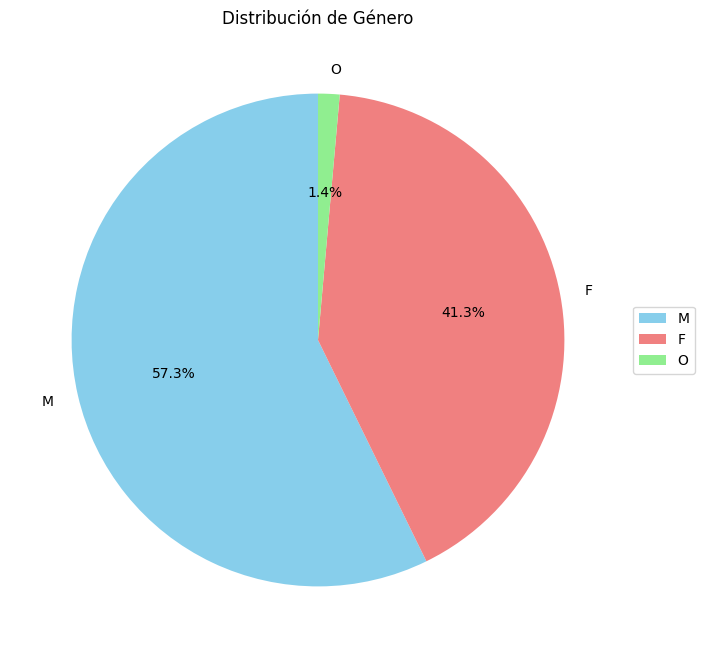

In [ ]:
# Contar la frecuencia de valores en la columna "gender"
conteo_genero = df1['gender'].value_counts()

# Crear un gráfico circular (pie chart)
plt.figure(figsize=(8, 8))
plt.pie(conteo_genero, labels=conteo_genero.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', "lightgreen"])

plt.title('Distribución de Género')

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")


plt.show()

##Prueba chi-cuadrado

In [ ]:
df1["Ofertas_Completadas"].value_counts().sort_index(ascending = True)

0.0    2501
1.0    2611
2.0    3017
3.0    3001
4.0    2189
5.0     968
6.0     200
Name: Ofertas_Completadas, dtype: int64

In [ ]:
# Crea una tabla pivote en Pandas utilizando df1 con 'gender' como índice y 'Ofertas_Completadas' como columnas
df1.pivot_table(index="gender", columns="Ofertas_Completadas", aggfunc= "size" )

Ofertas_Completadas,0.0,1.0,2.0,3.0,4.0,5.0,6.0
gender,,,,,,,
F,598,883,1353,1457,1076,519,103
M,1878,1693,1623,1495,1076,436,93
O,25,35,41,49,37,13,4


In [ ]:
# Crea una tabla pivote en Pandas utilizando df1 con 'gender' como índice y 'Ofertas_Completadas' como columnas,
# y luego normaliza los valores dividiendo por el número total de observaciones en cada grupo.
df1.pivot_table(index="gender", columns="Ofertas_Completadas", aggfunc= "size" )/np.array([5989, 8294, 204])[:, np.newaxis]

Ofertas_Completadas,0.0,1.0,2.0,3.0,4.0,5.0,6.0
gender,,,,,,,
F,0.099850,0.147437,0.225914,0.243279,0.179663,0.086659,0.017198
M,0.226429,0.204123,0.195684,0.180251,0.129732,0.052568,0.011213
O,0.122549,0.171569,0.200980,0.240196,0.181373,0.063725,0.019608


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Crear la tabla de contingencia
tabla_contingencia = pd.crosstab(df1['gender'], df1['Ofertas_Completadas'])

# Calcular el coeficiente de contingencia Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_v_value = cramers_v(tabla_contingencia.values)
print(f"Coeficiente de contingencia Cramér's V: {cramers_v_value}")

# Prueba de chi-cuadrado
statistic_chi2, p_value_chi2, _, _ = chi2_contingency(tabla_contingencia)
print(f"Prueba de chi-cuadrado:\nEstadístico chi-cuadrado: {statistic_chi2}\nP-valor: {p_value_chi2}")

# Interpretación
if p_value_chi2 < 0.05:
    print("Se rechaza la hipótesis nula. Hay evidencia de asociación significativa entre las variables.")
else:
    print("No se puede rechazar la hipótesis nula. No hay suficiente evidencia de asociación significativa entre las variables.")


Coeficiente de contingencia Cramér's V: 0.14242393166526868
Prueba de chi-cuadrado:
Estadístico chi-cuadrado: 599.6449985143454
P-valor: 1.2622973247023104e-120
Se rechaza la hipótesis nula. Hay evidencia de asociación significativa entre las variables.


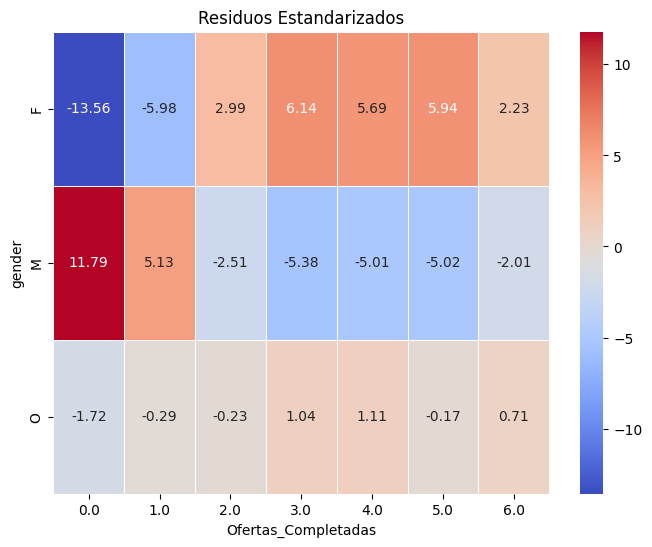

In [ ]:
# Calcular los residuos estandarizados
observed = tabla_contingencia.values
expected = chi2_contingency(tabla_contingencia)[3]
residuals = (observed - expected) /np.sqrt(expected)

# Crear un DataFrame para los residuos estandarizados con etiquetas de fila y columna
residuals_df = pd.DataFrame(residuals, index=tabla_contingencia.index, columns=tabla_contingencia.columns)

# Visualizar los residuos estandarizados
plt.figure(figsize=(8, 6))
sns.heatmap(residuals_df, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Residuos Estandarizados")
plt.show()

In [ ]:
df1["gender"].value_counts()

M    8294
F    5989
O     204
Name: gender, dtype: int64

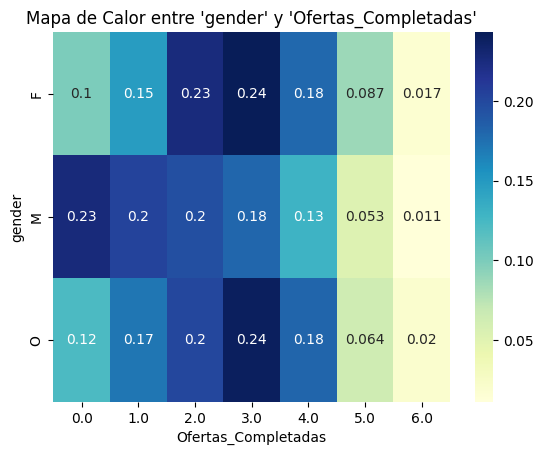

In [ ]:
# Visualiza un mapa de calor utilizando seaborn (sns) para la tabla pivote normalizada
sns.heatmap(df1.pivot_table(index="gender", columns="Ofertas_Completadas", aggfunc= "size" )/np.array([5989, 8294, 204])[:, np.newaxis], cmap="YlGnBu", annot=True)#, fmt="d")
plt.title("Mapa de Calor entre 'gender' y 'Ofertas_Completadas'")
plt.show()

In [ ]:
df1

,gender,age,became_member_on,income,total_value,transacciones,became_member_on_formateada,Ofertas_recibidas,Ofertas_Completadas,Oferta1,Oferta2,Oferta3,Oferta4,Oferta5,Oferta6,Oferta7,Oferta8,Ofertas_no_completadas
0,M,64,20130729,69000.0,93.88,25.0,2013-07-29,6.0,5.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
1,M,52,20130730,65000.0,32.53,16.0,2013-07-30,4.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
2,F,58,20130730,55000.0,63.95,18.0,2013-07-30,6.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
3,M,36,20130730,74000.0,37.12,8.0,2013-07-30,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,F,67,20130731,58000.0,57.64,5.0,2013-07-31,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14482,M,46,20180726,74000.0,217.23,12.0,2018-07-26,6.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0
14483,F,77,20180726,74000.0,67.17,4.0,2018-07-26,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
14484,M,85,20180726,45000.0,74.99,7.0,2018-07-26,4.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
14485,F,55,20180726,65000.0,134.47,7.0,2018-07-26,5.0,4.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0


##Pruebas estadísticas para comparar ingresos entre grupos de género

In [ ]:
# Datos
ofertas_m = df1[df1['gender'] == 'M']["income"]
ofertas_f = df1[df1['gender'] == 'F']["income"]
ofertas_o = df1[df1['gender'] == 'O']["income"]

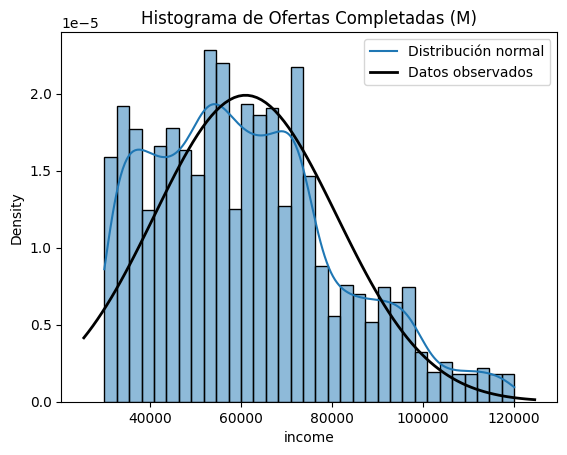

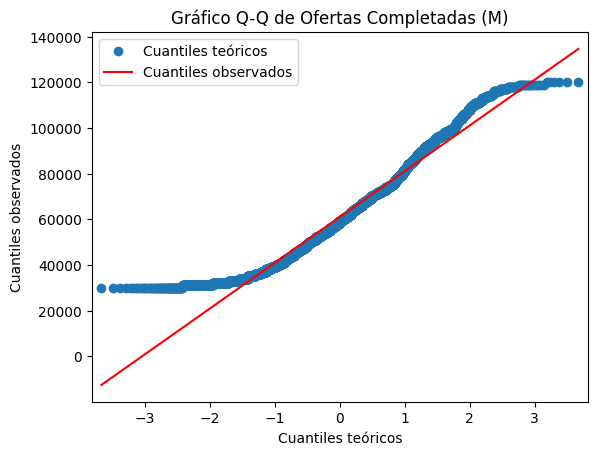

Estadístico de Anderson-Darling: 64.29541475367841
Valores críticos: [0.576 0.656 0.787 0.918 1.091]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
El estadístico de Anderson-Darling es mayor que el valor crítico, por lo que los datos de Ofertas Completadas (M) no siguen una distribución normal.


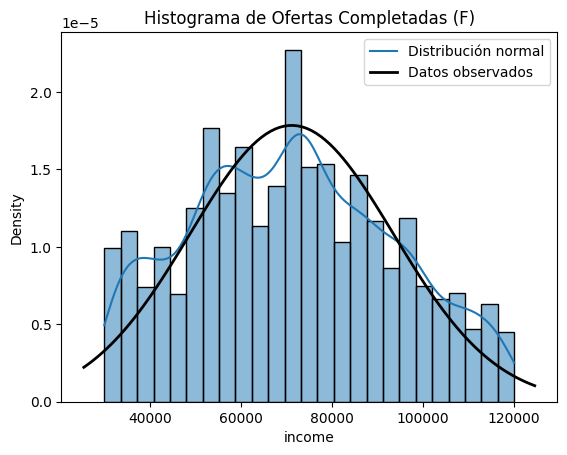

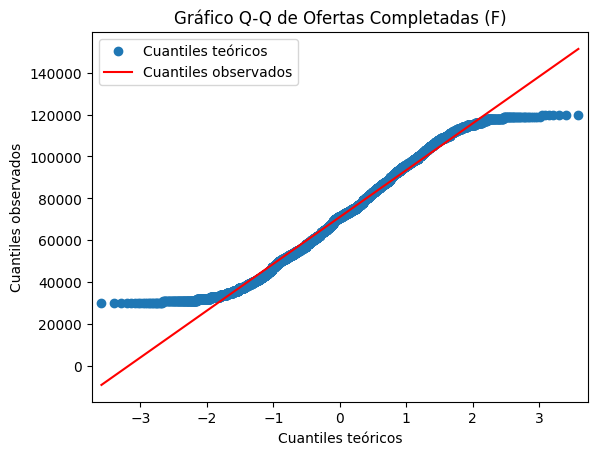

Estadístico de Anderson-Darling: 19.185944753141484
Valores críticos: [0.576 0.656 0.786 0.917 1.091]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
El estadístico de Anderson-Darling es mayor que el valor crítico, por lo que los datos de Ofertas Completadas (F) no siguen una distribución normal.


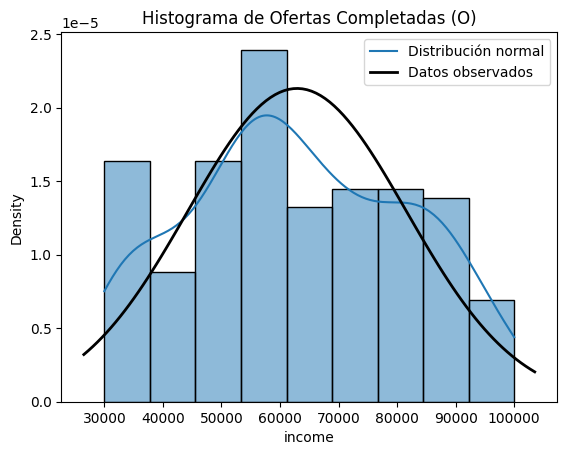

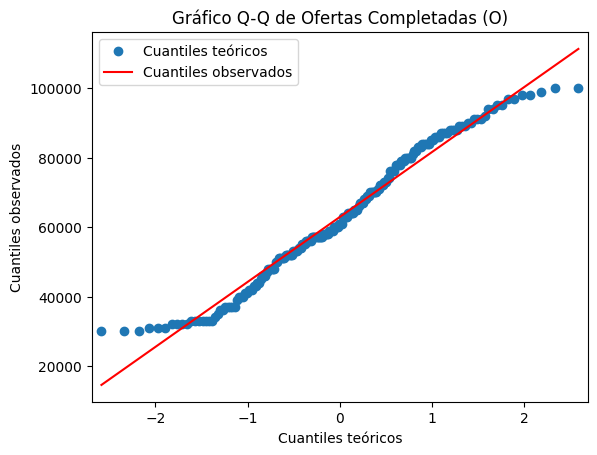

Estadístico de Anderson-Darling: 1.2666573460295751
Valores críticos: [0.565 0.644 0.772 0.901 1.072]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
El estadístico de Anderson-Darling es mayor que el valor crítico, por lo que los datos de Ofertas Completadas (O) no siguen una distribución normal.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, anderson
import statsmodels.api as sm

# Función para realizar la Prueba de Anderson-Darling y mostrar gráficos
def test_normality_and_plot(data, group_name):
    # Histograma con KDE
    sns.histplot(data, kde=True, label='Datos', stat='density')
    plt.title(f'Histograma de {group_name}')

    # Ajustar una distribución normal
    mu, std = norm.fit(data)

    # Crear un rango de valores para la distribución normal
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    # Graficar la distribución normal sobre el histograma
    plt.plot(x, p, 'k', linewidth=2)

    # Añadir leyenda
    plt.legend(['Distribución normal', 'Datos observados'])

    # Mostrar el histograma
    plt.show()

    # Q-Q plot
    sm.qqplot(data, line='s')
    plt.title(f'Gráfico Q-Q de {group_name}')

    # Añadir etiquetas al gráfico Q-Q
    plt.xlabel('Cuantiles teóricos')
    plt.ylabel('Cuantiles observados')

    # Añadir leyenda al gráfico Q-Q
    plt.legend(['Cuantiles teóricos', 'Cuantiles observados'])

    plt.show()

    # Prueba de Anderson-Darling
    anderson_test = anderson(data, dist='norm')
    print("Estadístico de Anderson-Darling:", anderson_test.statistic)
    print("Valores críticos:", anderson_test.critical_values)
    print("Niveles de significancia:", anderson_test.significance_level)

    # Comprobar si el estadístico es mayor que el valor crítico
    if anderson_test.statistic > anderson_test.critical_values[2]:
        print(f"El estadístico de Anderson-Darling es mayor que el valor crítico, por lo que los datos de {group_name} no siguen una distribución normal.")
    else:
        print(f"No hay evidencia suficiente para rechazar la hipótesis nula de normalidad en los datos de {group_name}.")

# Aplicar la prueba a cada grupo
test_normality_and_plot(ofertas_m, 'Ofertas Completadas (M)')
test_normality_and_plot(ofertas_f, 'Ofertas Completadas (F)')
test_normality_and_plot(ofertas_o, 'Ofertas Completadas (O)')

In [ ]:
from scipy.stats import levene
# Realizar la prueba de Levene
levene_result = levene(ofertas_m, ofertas_f, ofertas_o)

# Imprimir los resultados
print("Resultado de la prueba de Levene:")
print(levene_result)

# Comprobar si el p-valor es significativo
if levene_result.pvalue < 0.05:
    print("El p-valor es menor que 0.05, por lo que hay evidencia de heterocedasticidad (diferencias significativas en las varianzas) entre los grupos.")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula de igualdad de varianzas entre los grupos.")

Resultado de la prueba de Levene:
LeveneResult(statistic=62.09427813915909, pvalue=1.4052447384352217e-27)
El p-valor es menor que 0.05, por lo que hay evidencia de heterocedasticidad (diferencias significativas en las varianzas) entre los grupos.


In [ ]:
from scipy.stats import boxcox

# Aplicar la transformación Box-Cox a los datos
ofertas_m_boxcox, _ = boxcox(ofertas_m)
ofertas_f_boxcox, _ = boxcox(ofertas_f)
ofertas_o_boxcox, _ = boxcox(ofertas_o)

# Realizar la prueba de Levene en los datos transformados
statistic, p_value = levene(ofertas_m_boxcox, ofertas_f_boxcox, ofertas_o_boxcox)

# Imprimir los resultados
print("Estadístico de Levene (después de la transformación Box-Cox):", statistic)
print("Valor p:", p_value)

# Interpretar los resultados
if p_value < 0.05:
    print("Hay evidencia significativa de heterocedasticidad después de la transformación Box-Cox.")
else:
    print("No hay suficiente evidencia para rechazar la homocedasticidad después de la transformación Box-Cox.")


Estadístico de Levene (después de la transformación Box-Cox): 9104.285413498077
Valor p: 0.0
Hay evidencia significativa de heterocedasticidad después de la transformación Box-Cox.


In [ ]:
from scipy.stats import kruskal

# Realizar la prueba de Kruskal-Wallis
kruskal_result = kruskal(ofertas_m, ofertas_f, ofertas_o)

# Imprimir los resultados
print("Resultado de la prueba de Kruskal-Wallis:")
print(kruskal_result)

# Comprobar si el p-valor es significativo
if kruskal_result.pvalue < 0.05:
    print("El p-valor es menor que 0.05, por lo que hay diferencias significativas entre los grupos.")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula de igualdad de medianas entre los grupos.")

Resultado de la prueba de Kruskal-Wallis:
KruskalResult(statistic=743.6193880387908, pvalue=3.3504378729543904e-162)
El p-valor es menor que 0.05, por lo que hay diferencias significativas entre los grupos.


In [ ]:
from scipy.stats import mannwhitneyu

def compare_groups(group1, group2, group1_name, group2_name):
    statistic, p_value = mannwhitneyu(group1, group2)
    print(f"{group1_name} vs {group2_name}:")
    print(f"Estadístico: {statistic}, P-valor: {p_value}")

    if p_value < 0.05:
        print(f"Se rechaza la hipótesis nula. Hay evidencia de diferencias significativas entre {group1_name} y {group2_name}.\n")
    else:
        print(f"No se puede rechazar la hipótesis nula. No hay suficiente evidencia de diferencias significativas entre {group1_name} y {group2_name}.\n")

# Comparaciones entre grupos M, F y O
print("Prueba de Mann-Whitney U para comparar grupos")
compare_groups(ofertas_m, ofertas_f, "M", "F")
compare_groups(ofertas_m, ofertas_o, "M", "O")
compare_groups(ofertas_f, ofertas_o, "F", "O")


Prueba de Mann-Whitney U para comparar grupos
M vs F:
Estadístico: 18215634.5, P-valor: 2.8156490493776566e-163
Se rechaza la hipótesis nula. Hay evidencia de diferencias significativas entre M y F.

M vs O:
Estadístico: 781705.5, P-valor: 0.06328489534636025
No se puede rechazar la hipótesis nula. No hay suficiente evidencia de diferencias significativas entre M y O.

F vs O:
Estadístico: 735638.0, P-valor: 6.746966317306436e-07
Se rechaza la hipótesis nula. Hay evidencia de diferencias significativas entre F y O.



##Distribuciones

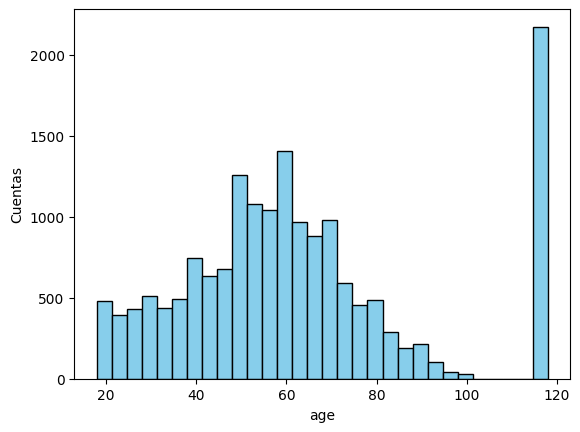

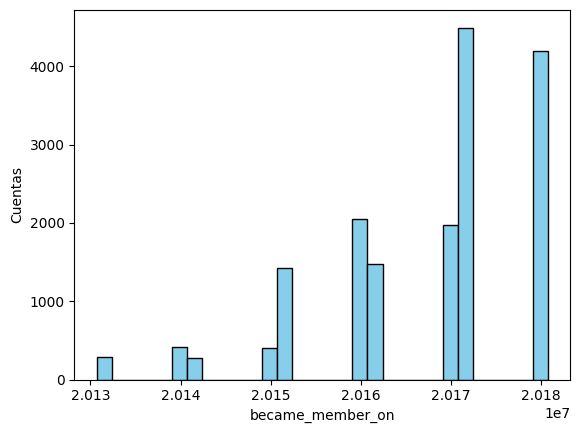

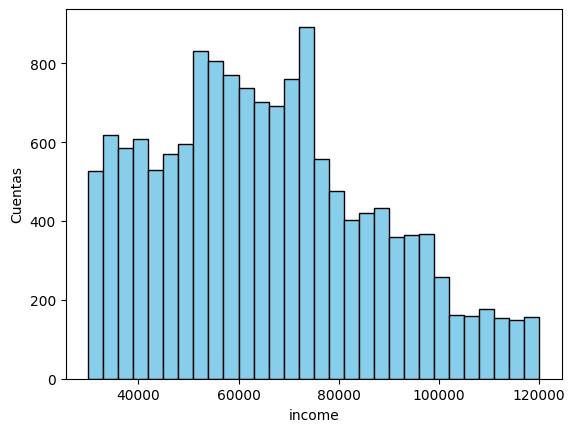

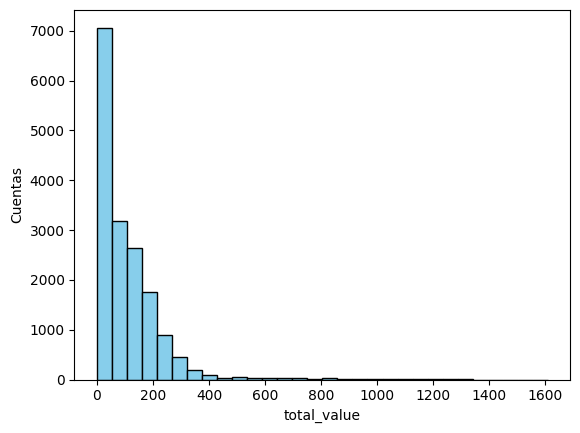

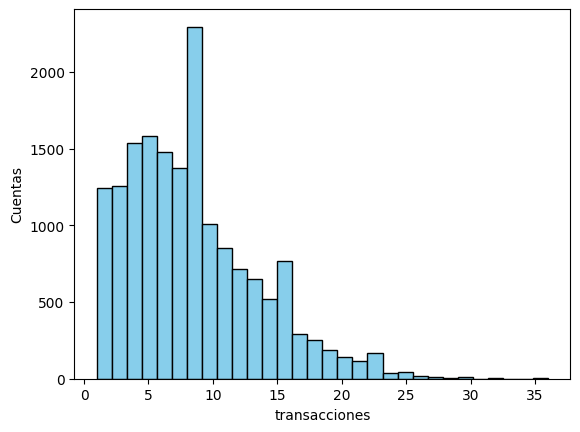

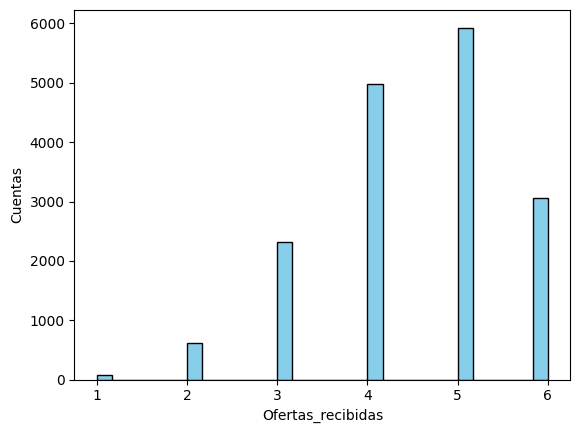

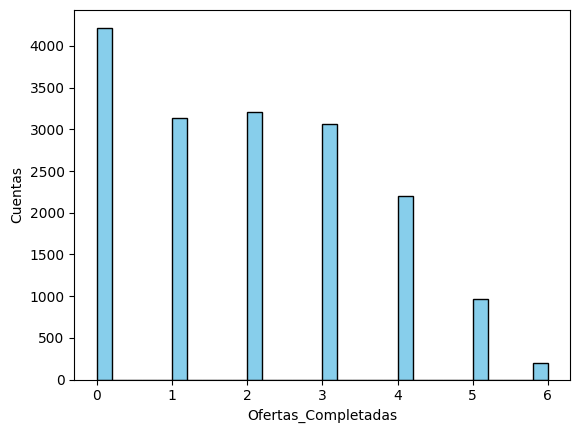

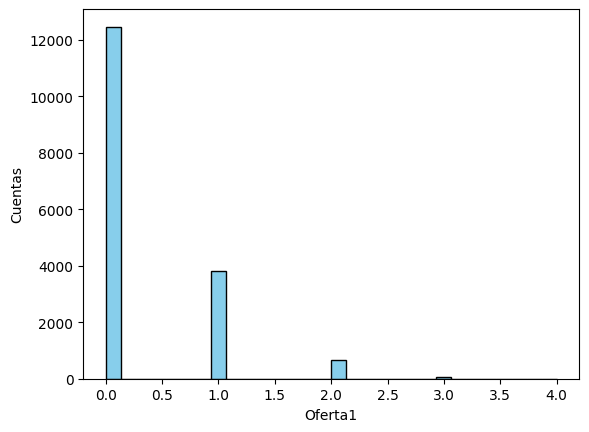

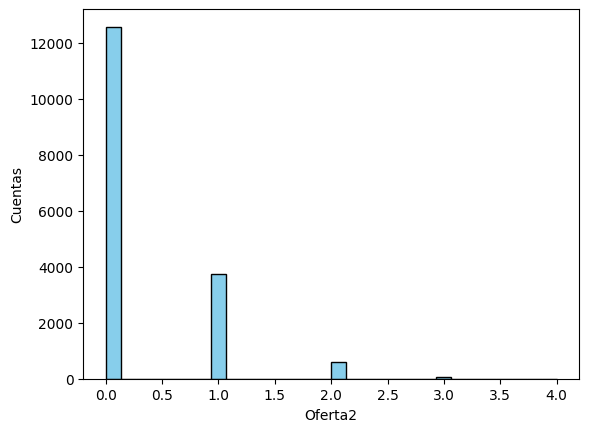

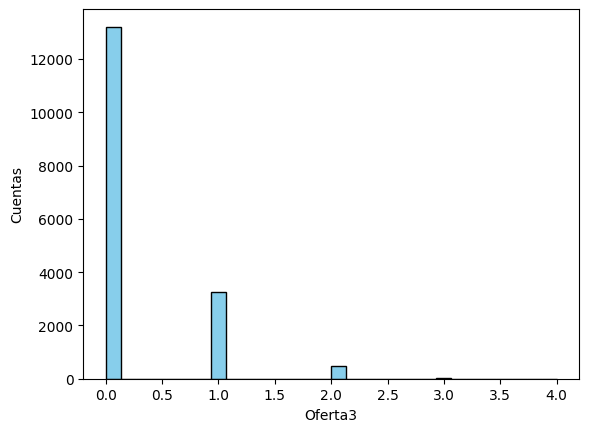

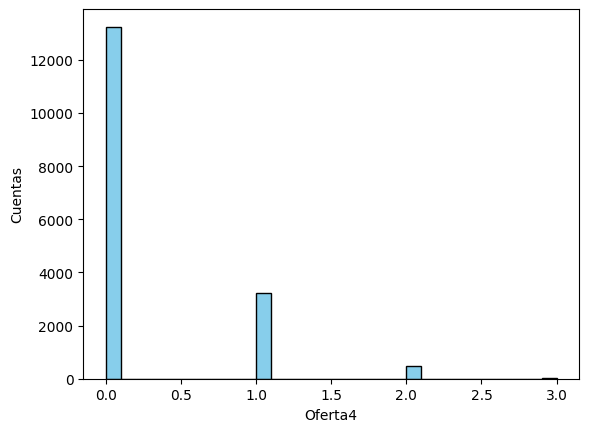

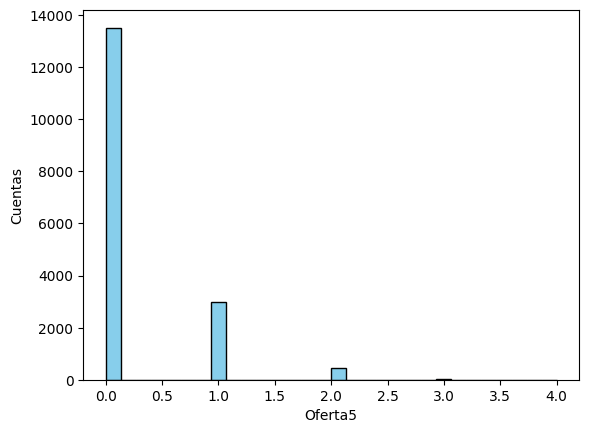

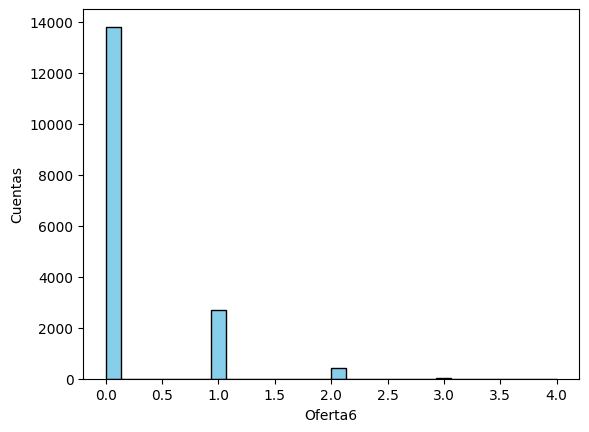

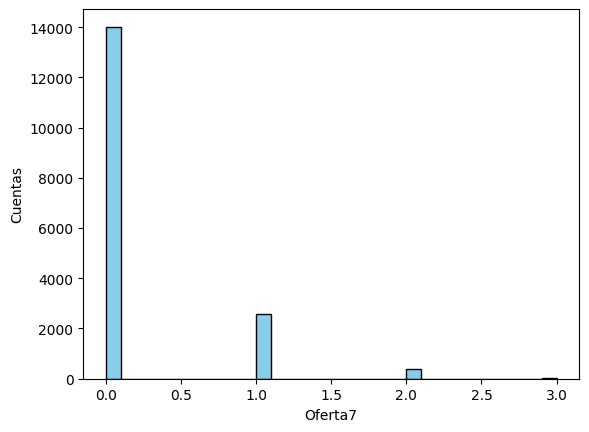

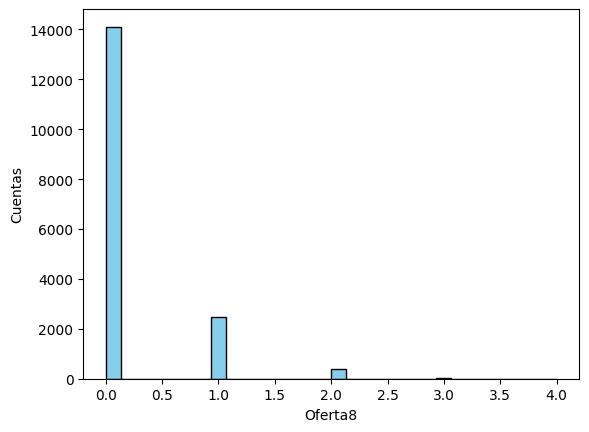

In [ ]:
# Genera histogramas para las columnas especificadas en el bucle
for i in ['age', 'became_member_on', 'income', 'total_value',
       'transacciones', 'Ofertas_recibidas', 'Ofertas_Completadas', 'Oferta1', 'Oferta2',
       'Oferta3', 'Oferta4', 'Oferta5', 'Oferta6', 'Oferta7', 'Oferta8']:
  plt.hist(df1[i], color='skyblue', bins=30, edgecolor='black')
  plt.xlabel(i)
  plt.ylabel("Cuentas")
  plt.show()

##Grafica de ofertas individuales

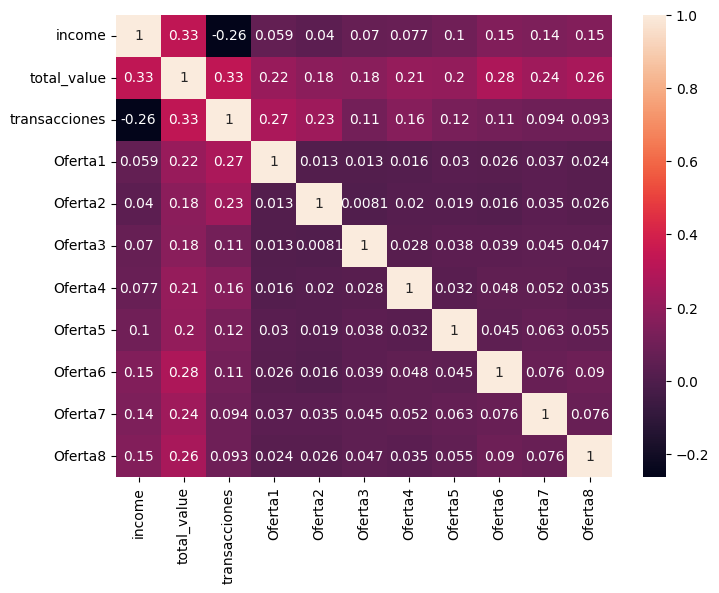

In [ ]:
# Calcula y visualiza la matriz de correlación para las columnas seleccionadas
corr_df =df1[['income', 'total_value',
       'transacciones', 'Oferta1', 'Oferta2',
       'Oferta3', 'Oferta4', 'Oferta5', 'Oferta6', 'Oferta7', 'Oferta8']].corr(method="pearson", numeric_only = True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

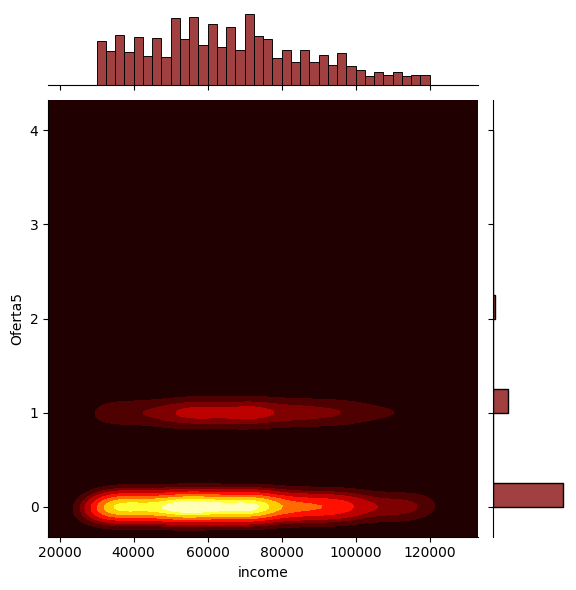

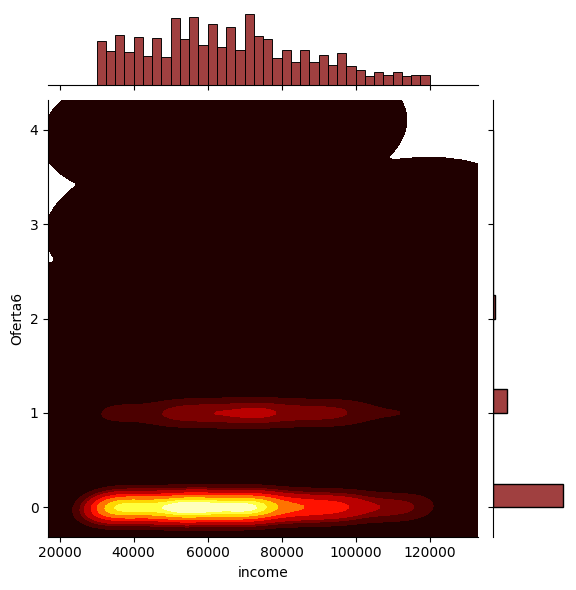

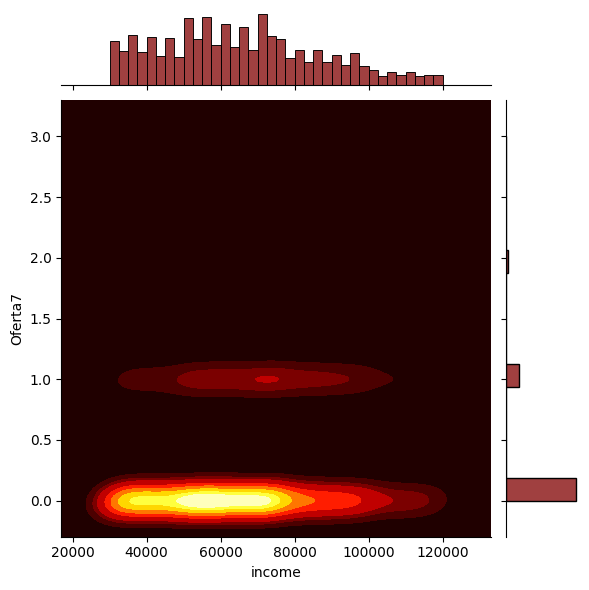

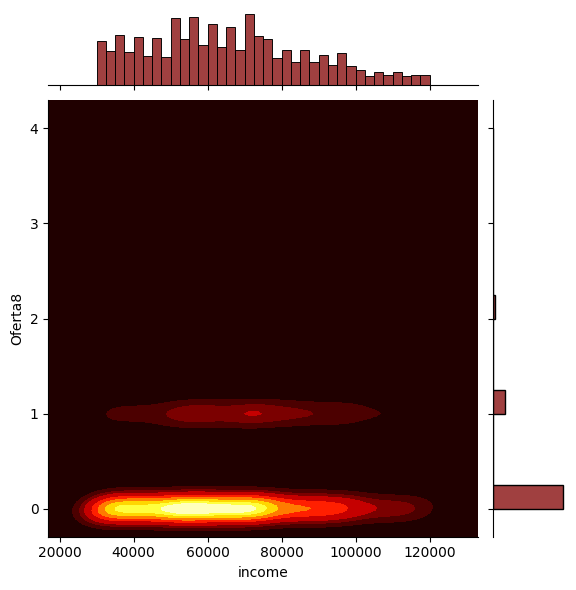

In [ ]:
# Genera gráficos de dispersión y distribución para las relaciones entre "income" y las ofertas específicas
for i in ["Oferta5", "Oferta6", "Oferta7", "Oferta8"]:
  g = sns.JointGrid(x = df1["income"], y = df1[i])
  g.plot_joint(sns.kdeplot, fill = True, cmap = "hot", thresh = 0)
  g.plot_marginals(sns.histplot, color = "maroon")

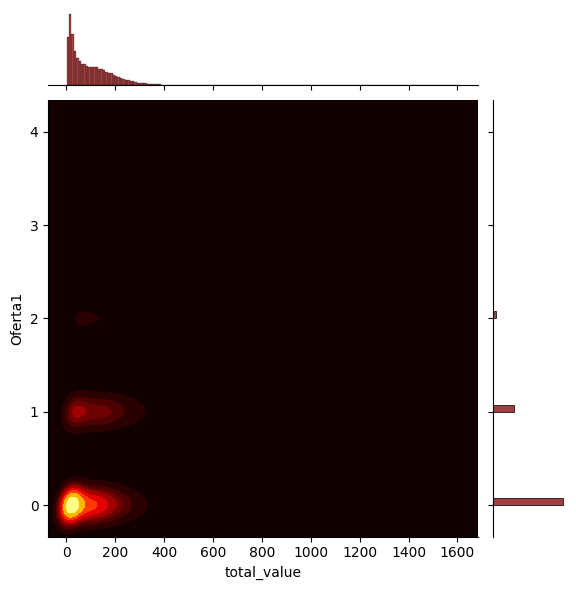

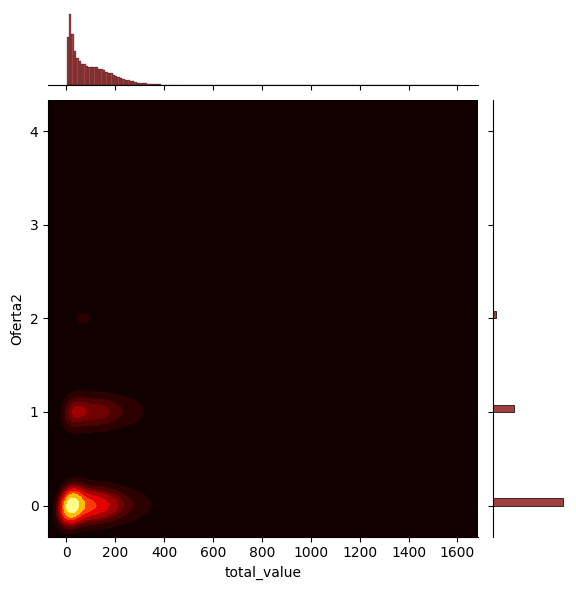

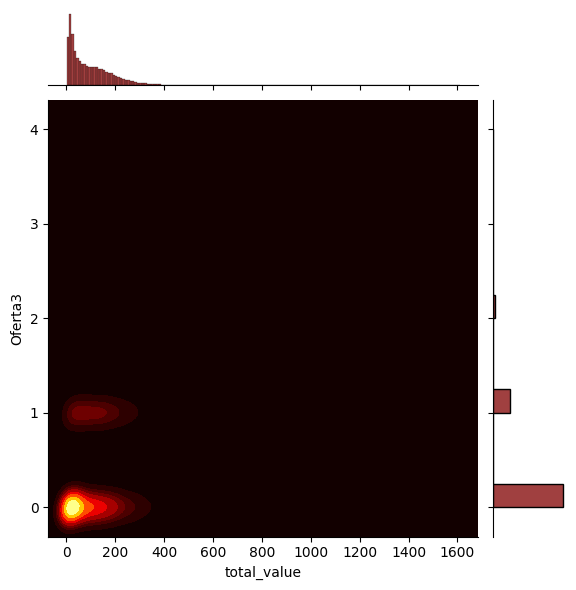

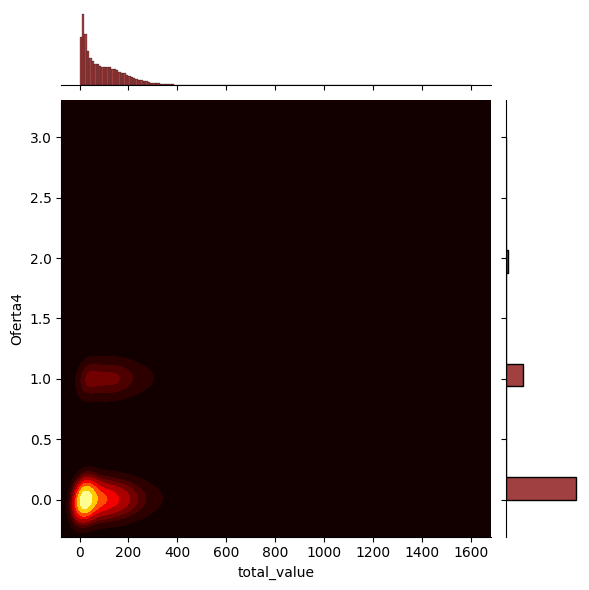

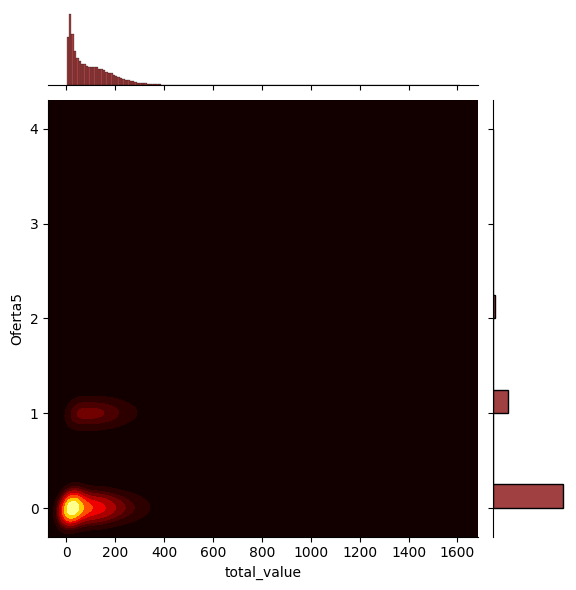

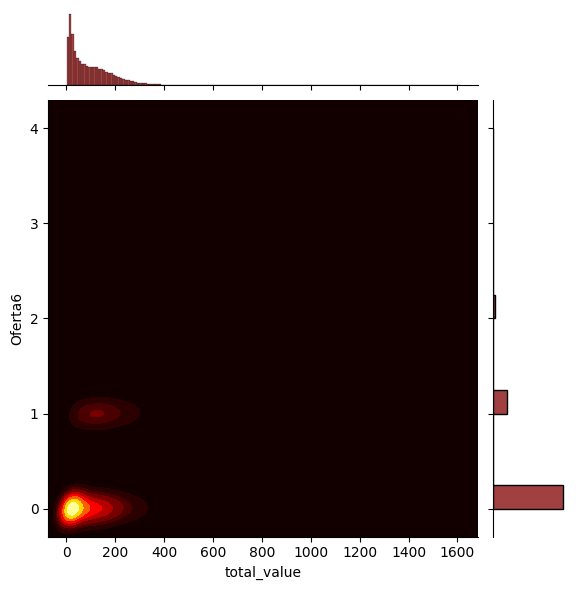

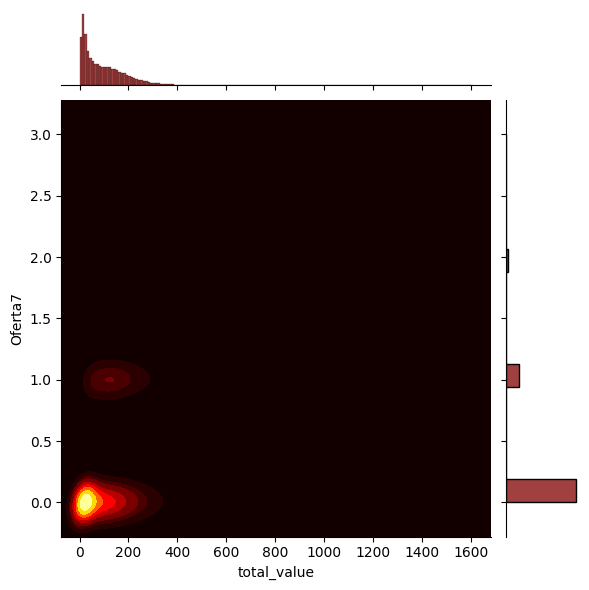

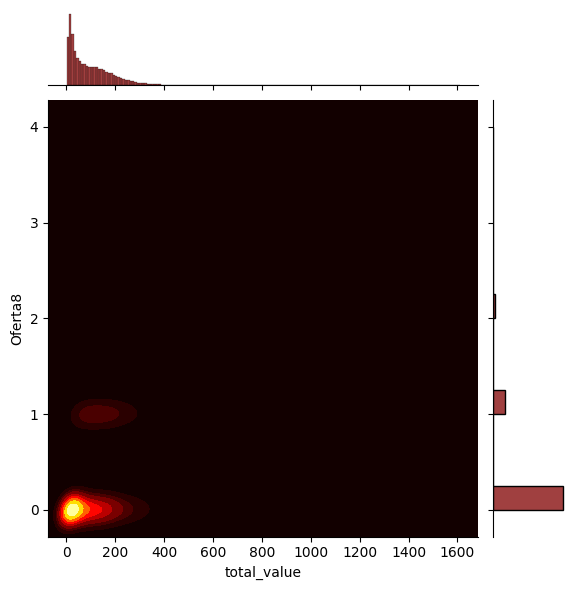

In [ ]:
# Genera gráficos de dispersión y distribución para las relaciones entre "total_value" y las ofertas específicas
for i in ["Oferta1", "Oferta2", "Oferta3", "Oferta4", "Oferta5", "Oferta6", "Oferta7", "Oferta8"]:
  g = sns.JointGrid(x = df1["total_value"], y = df1[i])
  g.plot_joint(sns.kdeplot, fill = True, cmap = "hot", thresh = 0)
  g.plot_marginals(sns.histplot, color = "maroon")

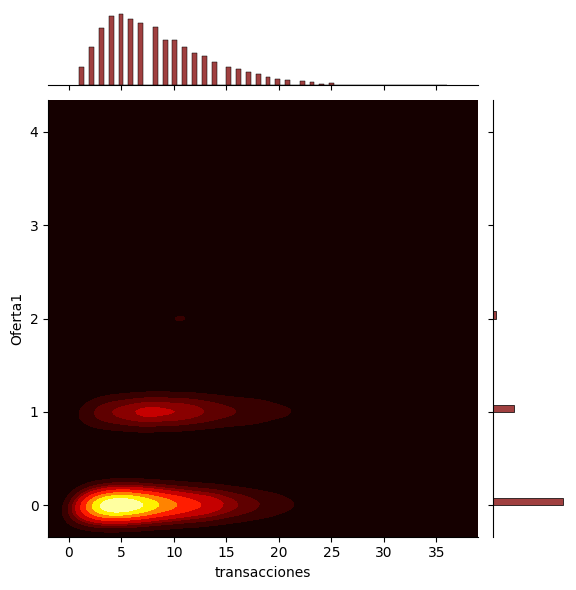

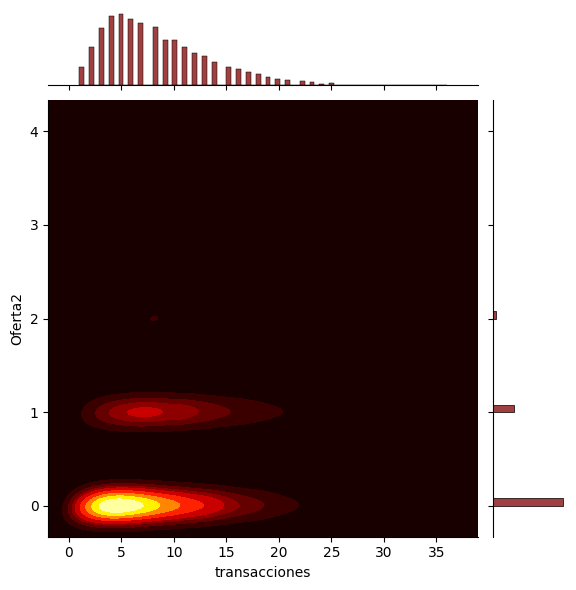

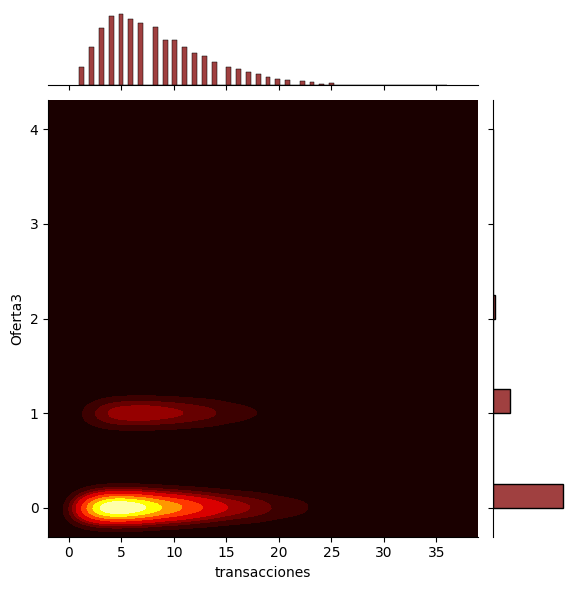

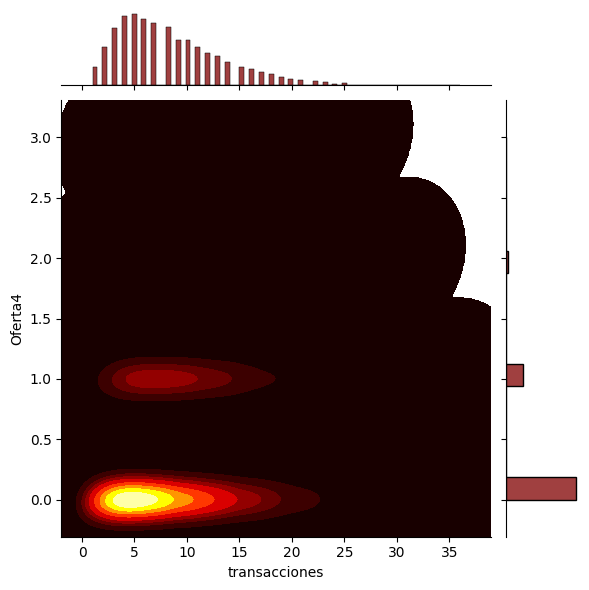

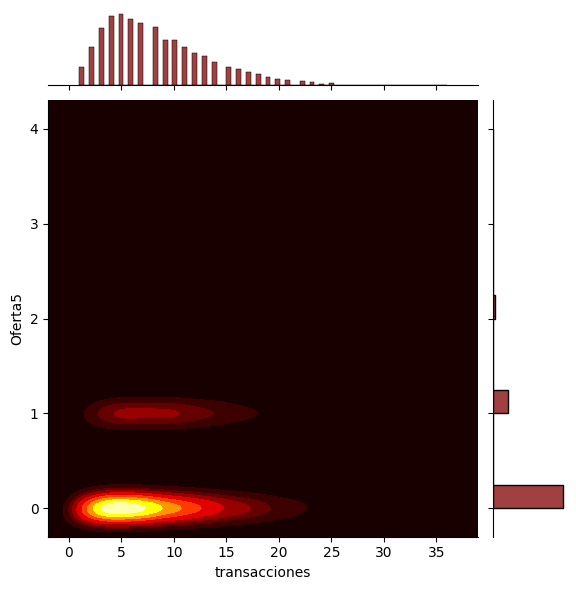

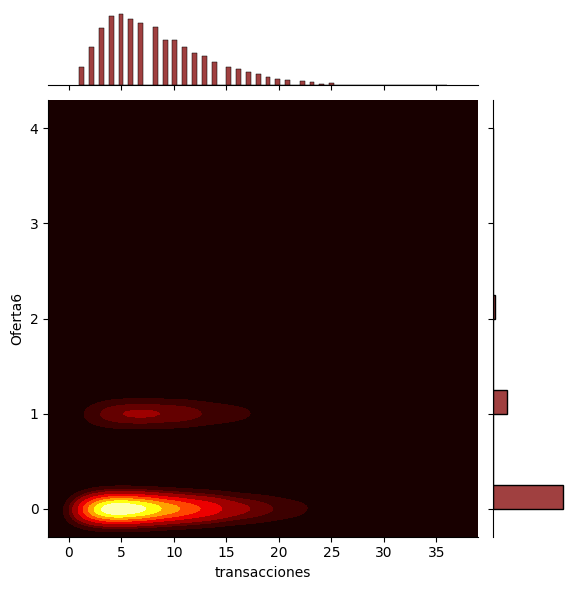

In [ ]:
# Genera gráficos de dispersión y distribución para las relaciones entre "transacciones" y las ofertas específicas
for i in ["Oferta1", "Oferta2", "Oferta3", "Oferta4", "Oferta5", "Oferta6"]:
  g = sns.JointGrid(x = df1["transacciones"], y = df1[i])
  g.plot_joint(sns.kdeplot, fill = True, cmap = "hot", thresh = 0)
  g.plot_marginals(sns.histplot, color = "maroon")

##Grafica de ofertas totales

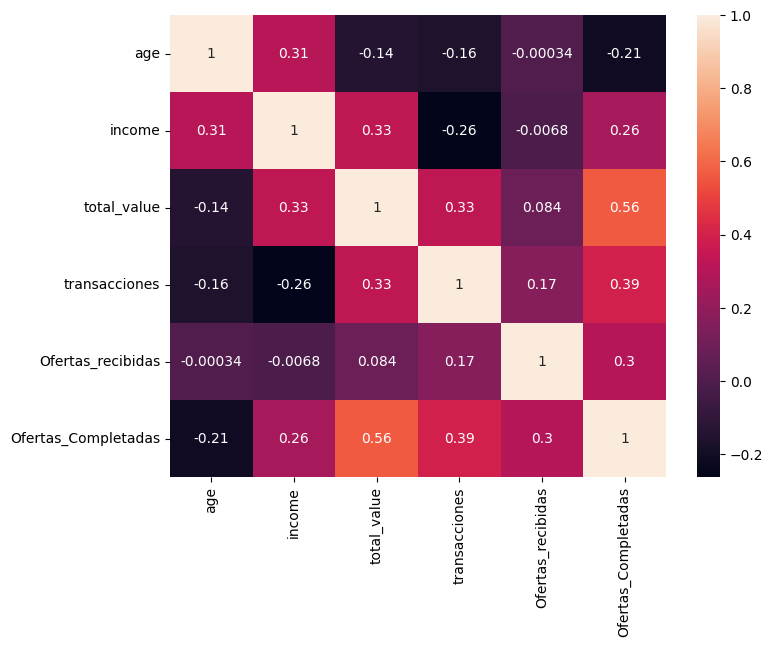

In [ ]:
# Calcula y visualiza la matriz de correlación para las columnas seleccionadas
corr_df =df1[["age", "income", "total_value", "transacciones", "Ofertas_recibidas", "Ofertas_Completadas"]].corr(method="pearson", numeric_only = True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

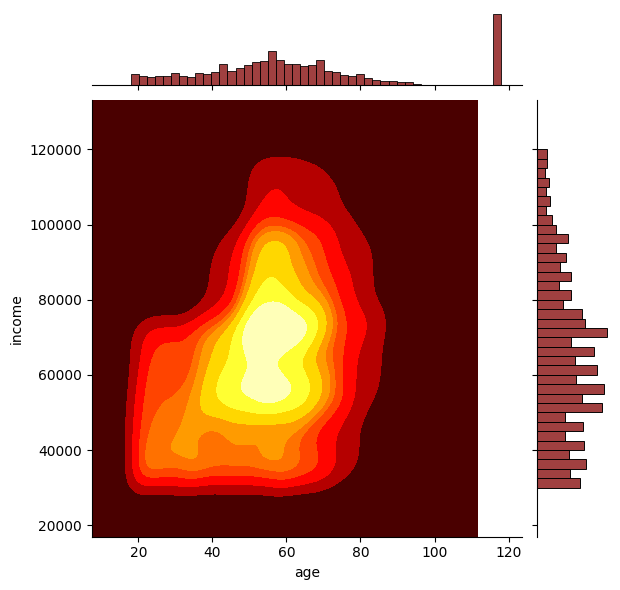

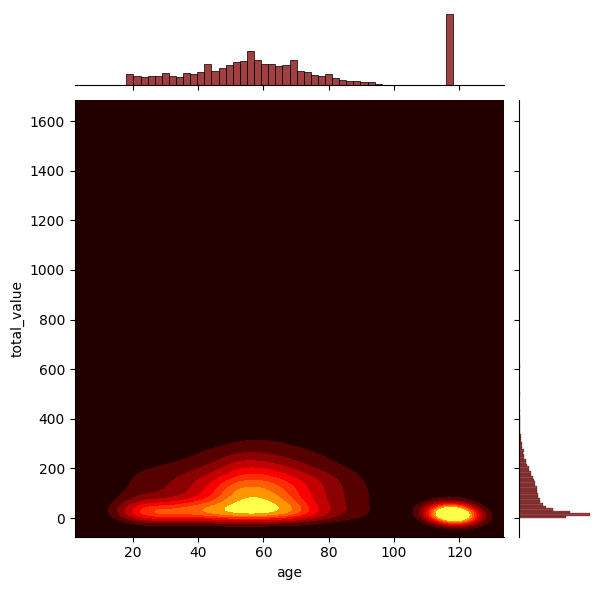

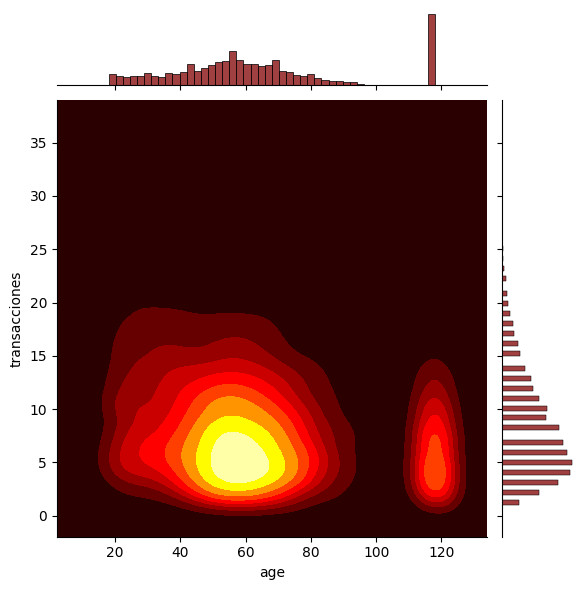

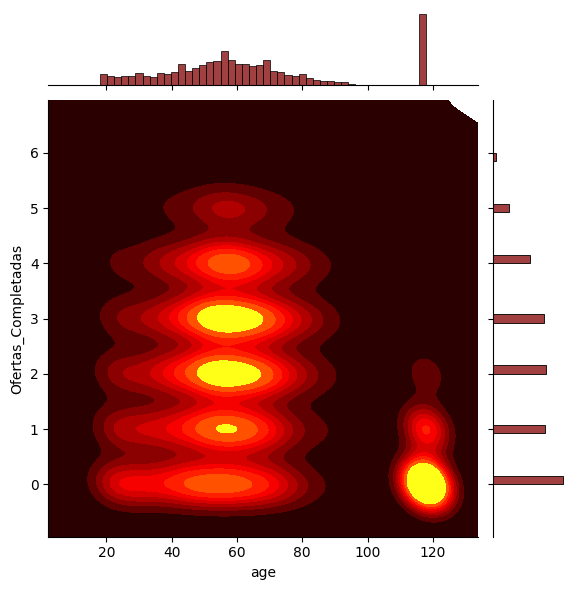

In [ ]:
# Genera gráficos de dispersión y distribución para las relaciones entre "age" y las variables seleccionadas
for i in ["income", "total_value", "transacciones", "Ofertas_Completadas"]:
  g = sns.JointGrid(x = df1["age"], y = df1[i])
  g.plot_joint(sns.kdeplot, fill = True, cmap = "hot", thresh = 0)
  g.plot_marginals(sns.histplot, color = "maroon")

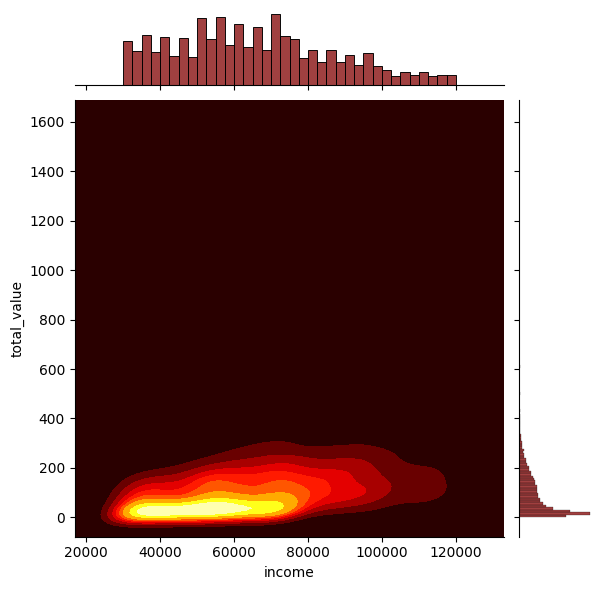

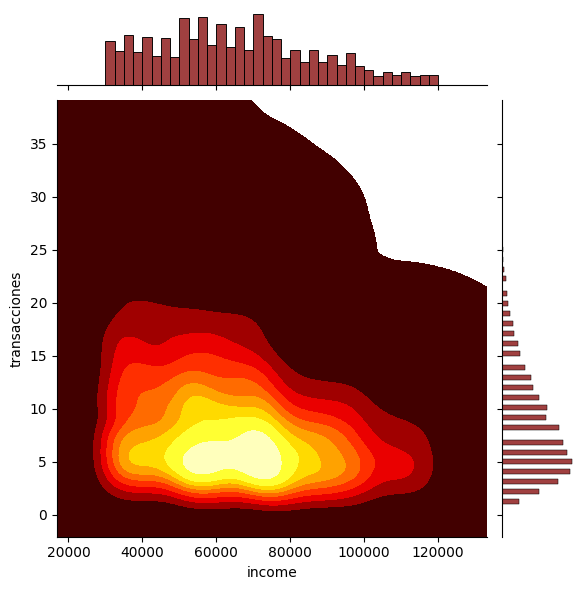

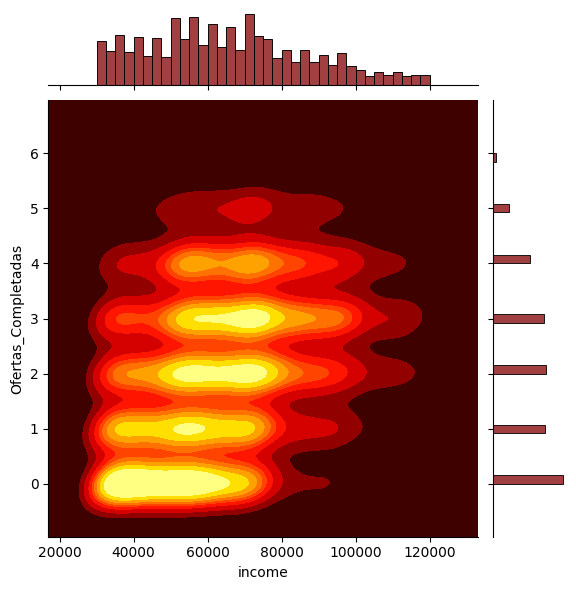

In [ ]:
# Genera gráficos de dispersión y distribución para las relaciones entre "income" y las variables seleccionadas
for i in ["total_value", "transacciones", "Ofertas_Completadas"]:
  g = sns.JointGrid(x = df1["income"], y = df1[i])
  g.plot_joint(sns.kdeplot, fill = True, cmap = "hot", thresh = 0)
  g.plot_marginals(sns.histplot, color = "maroon")

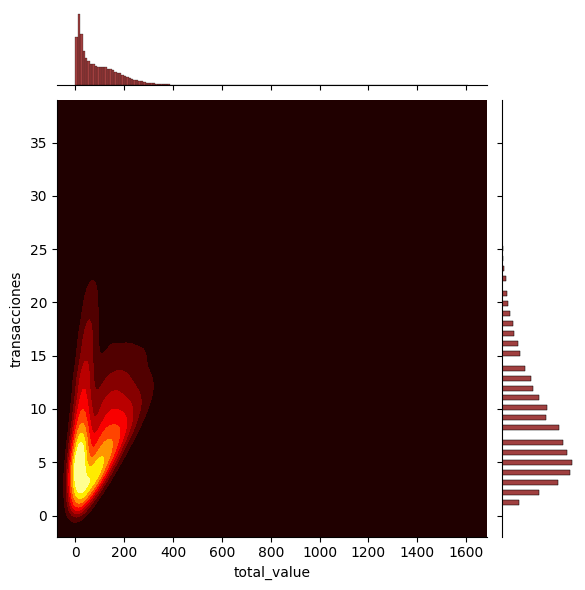

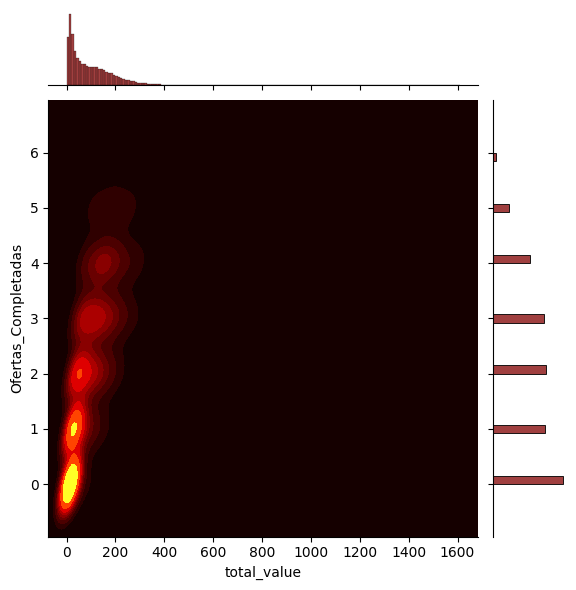

In [ ]:
# Genera gráficos de dispersión y distribución para las relaciones entre "total_value" y las variables seleccionadas
for i in ["transacciones", "Ofertas_Completadas"]:
  g = sns.JointGrid(x = df1["total_value"], y = df1[i])
  g.plot_joint(sns.kdeplot, fill = True, cmap = "hot", thresh = 0)
  g.plot_marginals(sns.histplot, color = "maroon")

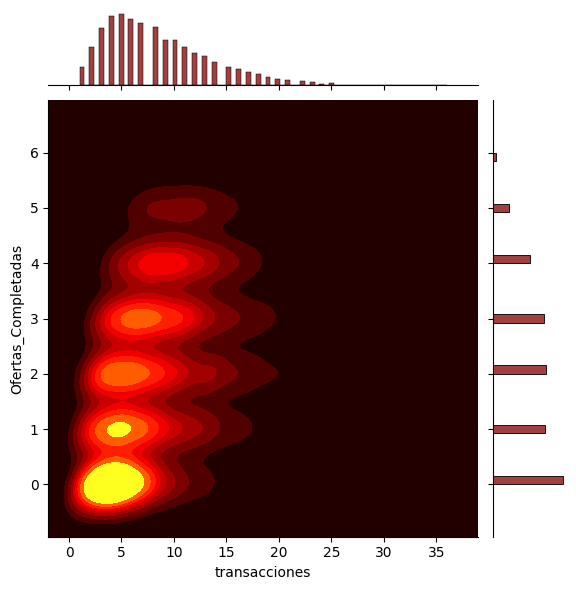

In [ ]:
# Genera un gráfico de dispersión y distribución para la relación entre "transacciones" y "Ofertas_Completadas"
for i in ["Ofertas_Completadas"]:
  g = sns.JointGrid(x = df1["transacciones"], y = df1[i])
  g.plot_joint(sns.kdeplot, fill = True, cmap = "hot", thresh = 0)
  g.plot_marginals(sns.histplot, color = "maroon")

## Ofertas mas solicitadas

In [ ]:
df1

,gender,age,id,became_member_on,income,total_value,transacciones,became_member_on_formateada,person,Ofertas_recibidas,Ofertas_Completadas,Oferta1,Oferta2,Oferta3,Oferta4,Oferta5,Oferta6,Oferta7,Oferta8
0,M,64,77388a70eaf14433b4efc5d01fa947bf,20130729,69000.0,93.88,25.0,2013-07-29,77388a70eaf14433b4efc5d01fa947bf,6.0,5.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,M,52,5ffdab087e674149a89324a732b4f993,20130730,65000.0,32.53,16.0,2013-07-30,5ffdab087e674149a89324a732b4f993,4.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,F,58,d25f38519a89455499c9e49e67ae1511,20130730,55000.0,63.95,18.0,2013-07-30,d25f38519a89455499c9e49e67ae1511,6.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,M,36,dbb4766b7dd94ca2b83a855312a3ebe9,20130730,74000.0,37.12,8.0,2013-07-30,dbb4766b7dd94ca2b83a855312a3ebe9,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,67,7b42b5bbe237406aaf2748a09050f745,20130731,58000.0,57.64,5.0,2013-07-31,7b42b5bbe237406aaf2748a09050f745,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,M,46,e4989ca3d8974e28a3fe87aa0b0ce327,20180726,74000.0,217.23,12.0,2018-07-26,e4989ca3d8974e28a3fe87aa0b0ce327,6.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
16996,F,77,e9b06d3e0b0e4aa1bf5da8d9e11dcde0,20180726,74000.0,67.17,4.0,2018-07-26,e9b06d3e0b0e4aa1bf5da8d9e11dcde0,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
16997,M,85,f1f01be4e2344bf08b7f488c115ad374,20180726,45000.0,74.99,7.0,2018-07-26,f1f01be4e2344bf08b7f488c115ad374,4.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
16998,F,55,f69e66bb9d2e41eaa2aacbaa18632c08,20180726,65000.0,134.47,7.0,2018-07-26,f69e66bb9d2e41eaa2aacbaa18632c08,5.0,4.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0


In [ ]:
# Ordena la suma de las columnas seleccionadas de menor a mayor
df1[['Ofertas_recibidas', 'Ofertas_Completadas', 'Oferta1', 'Oferta2',
      'Oferta3', 'Oferta4', 'Oferta5', 'Oferta6', 'Oferta7', 'Oferta8']].sum().sort_values()

Oferta8                 3331.0
Oferta7                 3420.0
Oferta6                 3688.0
Oferta5                 4017.0
Oferta4                 4296.0
Oferta3                 4354.0
Oferta2                 5156.0
Oferta1                 5317.0
Ofertas_Completadas    33579.0
Ofertas_recibidas      76277.0
dtype: float64

In [ ]:
spark.sql("Select * from table1").show()

+---+------+--------------------+----------+--------+-------------+--------------------+
|_c0|reward|            channels|difficulty|duration|   offer_type|                  id|
+---+------+--------------------+----------+--------+-------------+--------------------+
|  0|    10|['email', 'mobile...|        10|       7|         bogo|ae264e3637204a6fb...|
|  1|    10|['web', 'email', ...|        10|       5|         bogo|4d5c57ea9a6940dd8...|
|  2|     0|['web', 'email', ...|         0|       4|informational|3f207df678b143eea...|
|  3|     5|['web', 'email', ...|         5|       7|         bogo|9b98b8c7a33c4b65b...|
|  4|     5|    ['web', 'email']|        20|      10|     discount|0b1e1539f2cc45b7b...|
|  5|     3|['web', 'email', ...|         7|       7|     discount|2298d6c36e964ae4a...|
|  6|     2|['web', 'email', ...|        10|      10|     discount|fafdcd668e3743c1b...|
|  7|     0|['email', 'mobile...|         0|       3|informational|5a8bc65990b245e5a...|
|  8|     5|['web', '

In [ ]:
# Crea un nuevo DataFrame Spark llamado df_ofertas_completadas mediante una consulta SQL
df_ofertas_completadas3 = spark.sql(" \
    SELECT person, value, COUNT(*) AS Oferta_recibida \
    FROM table3 \
    WHERE event = 'offer received' \
    GROUP BY person, value \
    ORDER BY COUNT(*) DESC \
")

In [ ]:
# Lista de ofertas
Ofertas2 = ["{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}",
 "{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}",
 "{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}",
 "{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}",
 "{'offer id': '2906b810c7d4411798c6938adc9daaa5'}",
 "{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}",
 "{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}",
 "{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}"]

In [ ]:
# Itera sobre las ofertas y crea columnas condicionales en el DataFrame df_ofertas_completadas3
kkkk = 1
for i in Ofertas2:
  df_ofertas_completadas3 = df_ofertas_completadas3.withColumn(f'Oferta{kkkk}', F.when(df_ofertas_completadas3.value == i,
    df_ofertas_completadas3.Oferta_recibida ).otherwise( 0 ))
  kkkk +=1

In [ ]:
df_ofertas_completadas3.show()

+--------------------+--------------------+---------------+-------+-------+-------+-------+-------+-------+-------+-------+
|              person|               value|Oferta_recibida|Oferta1|Oferta2|Oferta3|Oferta4|Oferta5|Oferta6|Oferta7|Oferta8|
+--------------------+--------------------+---------------+-------+-------+-------+-------+-------+-------+-------+-------+
|eece6a9a7bdd4ea1b...|{'offer id': '5a8...|              5|      0|      0|      0|      0|      0|      0|      0|      0|
|43a50d7e5c8547a9a...|{'offer id': '0b1...|              5|      0|      0|      0|      0|      0|      0|      5|      0|
|2ea50de315514ccaa...|{'offer id': 'faf...|              5|      5|      0|      0|      0|      0|      0|      0|      0|
|6d2db3aad94648259...|{'offer id': 'f19...|              5|      0|      0|      0|      5|      0|      0|      0|      0|
|23d67a23296a48578...|{'offer id': '5a8...|              5|      0|      0|      0|      0|      0|      0|      0|      0|
|91e68a1

In [ ]:
# Crea una vista temporal llamada 'table4' para el DataFrame df_ofertas_completadas
df_ofertas_completadas3.createOrReplaceTempView('table5')

In [ ]:
# Creación de un nuevo DataFrame con la agregación de las ofertas completadas
df_ofertas_completadas3 = spark.sql(" \
    SELECT person, \
           SUM(Oferta_recibida) AS Ofertas_recibidas, \
           SUM(Oferta1) AS Oferta1, \
           SUM(Oferta2) AS Oferta2, \
           SUM(Oferta3) AS Oferta3, \
           SUM(Oferta4) AS Oferta4, \
           SUM(Oferta5) AS Oferta5, \
           SUM(Oferta6) AS Oferta6, \
           SUM(Oferta7) AS Oferta7, \
           SUM(Oferta8) AS Oferta8 \
    FROM table5 \
    GROUP BY person \
")

In [ ]:
df_ofertas_completadas3.show()

+--------------------+-----------------+-------+-------+-------+-------+-------+-------+-------+-------+
|              person|Ofertas_recibidas|Oferta1|Oferta2|Oferta3|Oferta4|Oferta5|Oferta6|Oferta7|Oferta8|
+--------------------+-----------------+-------+-------+-------+-------+-------+-------+-------+-------+
|c05652fa9d2c4fac9...|                6|      0|      0|      1|      0|      1|      1|      1|      2|
|304183fd053441f0a...|                6|      0|      0|      1|      0|      0|      3|      1|      0|
|37aa48f7035f4b808...|                5|      0|      1|      1|      0|      2|      0|      0|      0|
|32a0f871e17c4cfdb...|                4|      0|      2|      1|      0|      0|      0|      0|      0|
|51db724d68504ec18...|                4|      0|      0|      0|      0|      1|      0|      0|      0|
|d3c24fa42d0947a4b...|                4|      0|      0|      1|      0|      0|      0|      1|      1|
|fc58860830e648c9b...|                4|      0|      2

In [ ]:
# Obtener la suma de las columnas
column_sums = df_ofertas_completadas3.agg(
    *[F.sum(col_name).alias(f"{col_name}_sum") for col_name in [
 'Oferta1',
 'Oferta2',
 'Oferta3',
 'Oferta4',
 'Oferta5',
 'Oferta6',
 'Oferta7',
 'Oferta8']]
)

# Mostrar el resultado
column_sums.show()

+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|Oferta1_sum|Oferta2_sum|Oferta3_sum|Oferta4_sum|Oferta5_sum|Oferta6_sum|Oferta7_sum|Oferta8_sum|
+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|       7597|       7646|       7677|       7571|       7632|       7658|       7668|       7593|
+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+



In [ ]:
# Seleccionar las columnas y calcular las sumas
selected_columns = ['Oferta1', 'Oferta2', 'Oferta3', 'Oferta4', 'Oferta5', 'Oferta6', 'Oferta7', 'Oferta8']
column_sums = df1[selected_columns].sum()

# Normalizar las sumas y ordenar de menor a mayor
normalized_sums = column_sums / [7597, 7646, 7677, 7571, 7632, 7658, 7668, 7593]
normalized_sums_sorted = normalized_sums.sort_values(ascending= False)

# Mostrar el resultado
print(normalized_sums_sorted)

Oferta1    0.699882
Oferta2    0.674340
Oferta4    0.567428
Oferta3    0.567149
Oferta5    0.526336
Oferta6    0.481588
Oferta7    0.446009
Oferta8    0.438694
dtype: float64


In [ ]:
dfdf = spark_df1

In [ ]:
# Itera sobre las ofertas y crea columnas condicionales en el DataFrame dfdf
kkkk = 1
dfdf = dfdf.withColumn('ranking', F.lit(10) )

for i in ['fafdcd668e3743c1bb461111dcafc2a4',
 '2298d6c36e964ae4a3e7e9706d1fb8c2',
 '9b98b8c7a33c4b65b9aebfe6a799e6d9',
 'f19421c1d4aa40978ebb69ca19b0e20d',
 '2906b810c7d4411798c6938adc9daaa5',
 'ae264e3637204a6fb9bb56bc8210ddfd',
 '0b1e1539f2cc45b7b9fa7c272da2e1d7',
 '4d5c57ea9a6940dd891ad53e9dbe8da0']:
  dfdf = dfdf.withColumn('ranking', F.when(dfdf.id == i,
    kkkk ).otherwise(dfdf.ranking) )
  kkkk +=1

In [ ]:
dfdf.orderBy("ranking").show()

+---+------+--------------------+----------+--------+-------------+--------------------+-------+
|_c0|reward|            channels|difficulty|duration|   offer_type|                  id|ranking|
+---+------+--------------------+----------+--------+-------------+--------------------+-------+
|  6|     2|['web', 'email', ...|        10|      10|     discount|fafdcd668e3743c1b...|      1|
|  5|     3|['web', 'email', ...|         7|       7|     discount|2298d6c36e964ae4a...|      2|
|  3|     5|['web', 'email', ...|         5|       7|         bogo|9b98b8c7a33c4b65b...|      3|
|  8|     5|['web', 'email', ...|         5|       5|         bogo|f19421c1d4aa40978...|      4|
|  9|     2|['web', 'email', ...|        10|       7|     discount|2906b810c7d441179...|      5|
|  0|    10|['email', 'mobile...|        10|       7|         bogo|ae264e3637204a6fb...|      6|
|  4|     5|    ['web', 'email']|        20|      10|     discount|0b1e1539f2cc45b7b...|      7|
|  1|    10|['web', 'email', .

##Fechas

In [ ]:
Miembros_nuevos = Mdf.groupby("became_member_on_formateada").count().orderBy("became_member_on_formateada", ascending = True).withColumnRenamed('count', 'Miembros_nuevos').toPandas()

In [ ]:
cm = sns.light_palette("green", as_cmap=True)

In [ ]:
Miembros_nuevos.head(20).style.background_gradient(cmap = cm)

,became_member_on_formateada,Miembros_nuevos
0,2013-07-29,1
1,2013-07-30,3
2,2013-07-31,1
3,2013-08-01,1
4,2013-08-02,3
5,2013-08-03,1
6,2013-08-04,2
7,2013-08-05,3
8,2013-08-06,1
9,2013-08-07,1


In [ ]:
Miembros_nuevos.index = pd.to_datetime(Miembros_nuevos["became_member_on_formateada"])
Miembros_nuevos = Miembros_nuevos.asfreq('D')

Miembros_nuevos['month'] = Miembros_nuevos.index.month
Miembros_nuevos["day_of_week"] = Miembros_nuevos.index.day_of_week+1
Miembros_nuevos["year"] = Miembros_nuevos.index.year

In [ ]:
Miembros_nuevos

,became_member_on_formateada,Miembros_nuevos,month,day_of_week,year
became_member_on_formateada,,,,,
2013-07-29,2013-07-29,1.0,7,1,2013
2013-07-30,2013-07-30,3.0,7,2,2013
2013-07-31,2013-07-31,1.0,7,3,2013
2013-08-01,2013-08-01,1.0,8,4,2013
2013-08-02,2013-08-02,3.0,8,5,2013
...,...,...,...,...,...
2018-07-22,2018-07-22,25.0,7,7,2018
2018-07-23,2018-07-23,9.0,7,1,2018
2018-07-24,2018-07-24,17.0,7,2,2018


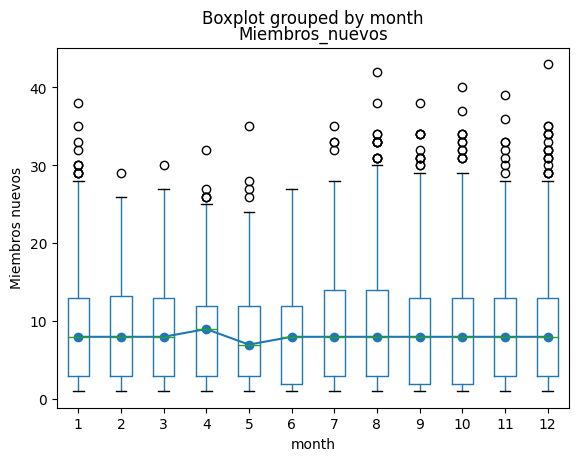

In [ ]:
Miembros_nuevos.boxplot(column="Miembros_nuevos", by = "month")
Miembros_nuevos.groupby("month")["Miembros_nuevos"].median().plot( style = "o-" )

plt.ylabel("Miembros nuevos")

plt.show()

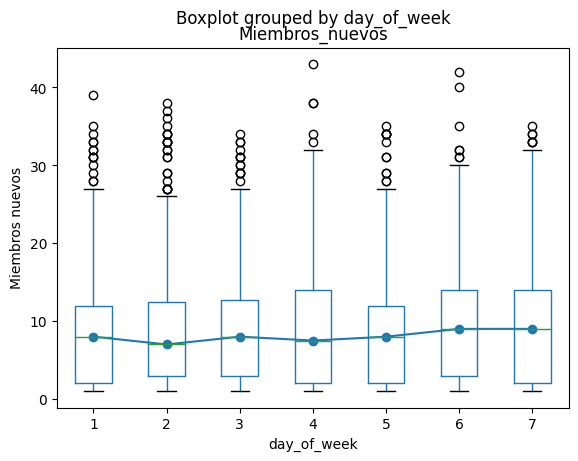

In [ ]:
Miembros_nuevos.boxplot(column="Miembros_nuevos", by = "day_of_week")
Miembros_nuevos.groupby("day_of_week")["Miembros_nuevos"].median().plot( style = "o-" )

plt.ylabel("Miembros nuevos")

plt.show()

In [ ]:
Miembros_nuevos.groupby("year")["Miembros_nuevos"].sum()

year
2013     286.0
2014     691.0
2015    1830.0
2016    3526.0
2017    6469.0
2018    4198.0
Name: Miembros_nuevos, dtype: float64

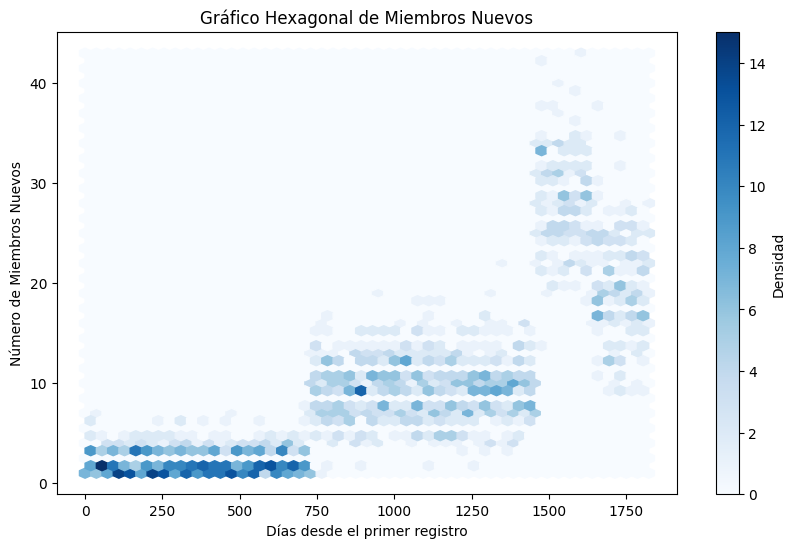

In [ ]:
import matplotlib.pyplot as plt

# Supongamos que Miembros_nuevos["became_member_on_formateada"] y Miembros_nuevos["Miembros_nuevos"] son Series de pandas

plt.figure(figsize=(10, 6))

plt.hexbin(
    x=range(0, len(Miembros_nuevos)),
    y=Miembros_nuevos["Miembros_nuevos"],
    gridsize=50,     # Tamaño de la cuadrícula hexagonal
    cmap="Blues"     # Mapa de colores
)

plt.title('Gráfico Hexagonal de Miembros Nuevos')
plt.xlabel('Días desde el primer registro')
plt.ylabel('Número de Miembros Nuevos')
plt.colorbar(label='Densidad')
plt.show()

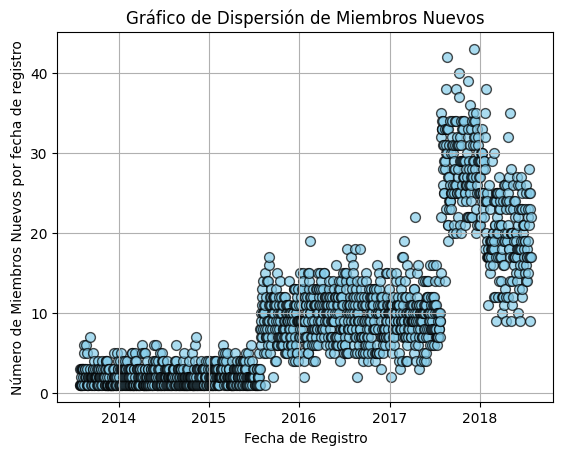

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(
    Miembros_nuevos.index,
    Miembros_nuevos["Miembros_nuevos"],
    color='#87CEEB',      # Color de los puntos
    s=50,              # Tamaño de los puntos
    alpha=0.7,         # Transparencia de los puntos (0 a 1)
    edgecolors='black'  # Color del borde de los puntos
)

plt.title('Gráfico de Dispersión de Miembros Nuevos')
plt.xlabel('Fecha de Registro')
plt.ylabel('Número de Miembros Nuevos por fecha de registro')
plt.grid(True)
plt.show()

#Transformación de variables

In [ ]:
df_final.show()

+------+---+--------------------+----------------+-------+------------------+-------------+---------------------------+--------------------+-----------------+-------------------+-------+-------+-------+-------+-------+-------+-------+-------+----------------------+
|gender|age|                  id|became_member_on| income|       total_value|transacciones|became_member_on_formateada|              person|Ofertas_recibidas|Ofertas_Completadas|Oferta1|Oferta2|Oferta3|Oferta4|Oferta5|Oferta6|Oferta7|Oferta8|Ofertas_no_completadas|
+------+---+--------------------+----------------+-------+------------------+-------------+---------------------------+--------------------+-----------------+-------------------+-------+-------+-------+-------+-------+-------+-------+-------+----------------------+
|     M| 64|77388a70eaf14433b...|        20130729|69000.0|             93.88|           25|                 2013-07-29|77388a70eaf14433b...|                6|                  5|      1|      1|      0|

In [ ]:
df_final.count()

17000

In [ ]:
df_final2 = df_final.na.drop()

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

In [ ]:
V_numericas = ['became_member_on', 'income', 'total_value',
 'transacciones','Ofertas_recibidas', 'Ofertas_Completadas', 'Ofertas_no_completadas'  ]

In [ ]:
assembler = VectorAssembler(inputCols=V_numericas[:], outputCol="features_num")

assembled_df = assembler.transform(df_final2)

standardScaler = StandardScaler(inputCol="features_num", outputCol="features_scaled")
scaled_df = standardScaler.fit(assembled_df).transform(assembled_df)

#OneHot Encoding

In [ ]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer

In [ ]:
from pyspark.ml import Pipeline

In [ ]:
V_categoricas = ["gender"]

In [ ]:
indexers = [ StringIndexer( inputCol = col, outputCol="{0}_index".format(col) ) for col in V_categoricas ]

encoders = [OneHotEncoder(dropLast = False, inputCol = indexer.getOutputCol(), outputCol="{0}_encoded". format(indexer.getOutputCol() ) )
for indexer in indexers]

input_columns = [encoder.getOutputCol() for encoder in encoders] + ["features_scaled"]
assembler = VectorAssembler(inputCols=input_columns, outputCol = "features")

#PCA

In [ ]:
from pyspark.ml.feature import PCA

In [ ]:
len(V_numericas+V_categoricas)

8

In [ ]:
# Inicializa el modelo PCA
num_principal_components = 8  # Número de componentes principales que deseas obtener
pca = PCA(k=num_principal_components, inputCol="features", outputCol="pca_features")

#Pipeline

In [ ]:
pipeline = Pipeline(stages = indexers+encoders+[assembler]+[pca])
data_model = pipeline.fit(scaled_df)
nombres_features = data_model.stages[0].labels
nombres_features

['M', 'F', 'O']

In [ ]:
# Obtiene la varianza explicada por cada componente principal
explained_variances = data_model.stages[3].explainedVariance.toArray()

# Calcula el número de componentes para conservar el 95% de la varianza
cumulative_variance = 0.0
num_components_to_keep = 0

for i, explained_variance in enumerate(explained_variances):
    cumulative_variance += explained_variance
    if cumulative_variance >= 0.95:
        num_components_to_keep = i + 1
        break

# Actualiza el modelo PCA con el número de componentes determinado
print(num_components_to_keep)

6


In [ ]:
pca.setK(num_components_to_keep)
data_model = pipeline.fit(scaled_df)

In [ ]:
transformed_df = data_model.transform(scaled_df)
transformed_df1 = transformed_df.select("pca_features")

In [ ]:
train_data = transformed_df1

#Se crea el modelo

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [ ]:
# Crear el modelo K-means para diferentes valores de k
k_values = range(2, 11)
kmeans_models = [KMeans(k=k, seed=42, featuresCol="pca_features", predictionCol=f"cluster_k{k}").fit(train_data) for k in k_values]

# Calcular la inercia para cada modelo
inercias = [model.summary.trainingCost for model in kmeans_models]

# Imprimir las inercias
for k, inertia in zip(k_values, inercias):
    print(f"K={k}, Inercia={inertia}")

K=2, Inercia=77194.53895359933
K=3, Inercia=66852.14667204447
K=4, Inercia=59042.15301963113
K=5, Inercia=52917.33562732191
K=6, Inercia=49825.29809024285
K=7, Inercia=45265.86229019492
K=8, Inercia=42324.54322630533
K=9, Inercia=40367.2020292067
K=10, Inercia=39024.80455752864


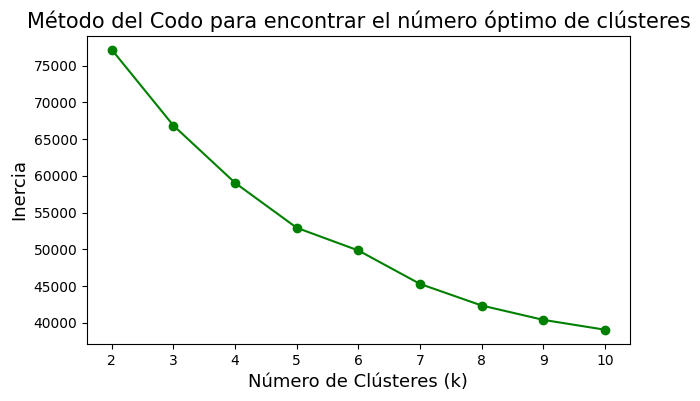

In [ ]:
# Recopilar las inercias al controlador
inercias_collected = np.array(inercias)

# Plotear la inercia
plt.figure(figsize=(7, 4))
plt.plot(range(2, 11), inercias_collected, "go-")
plt.ylabel("Inercia", fontsize=13)
plt.xlabel("Número de Clústeres (k)", fontsize=13)
plt.title("Método del Codo para encontrar el número óptimo de clústeres", fontsize=15)

plt.show()

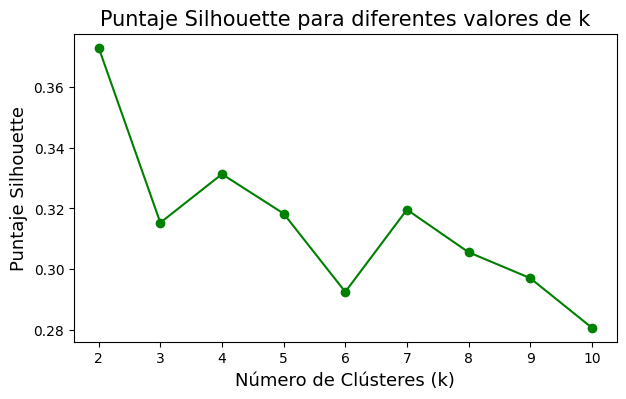

In [ ]:
# Crear un evaluador de clustering
evaluator = ClusteringEvaluator(predictionCol="prediction", featuresCol="pca_features")

# Calcular el puntaje de Silhouette para diferentes valores de k
silhouette_scores = [ClusteringEvaluator(predictionCol=model.summary.predictionCol, featuresCol="pca_features").evaluate(model.summary.predictions) for model in kmeans_models[:]]

# Plotear los puntajes de Silhouette
plt.figure(figsize=(7, 4))
plt.plot(range(2, 11), silhouette_scores, "go-")
plt.xlabel("Número de Clústeres (k)", fontsize=13)
plt.ylabel("Puntaje Silhouette", fontsize=13)
plt.title("Puntaje Silhouette para diferentes valores de k", fontsize=15)

plt.show()

##Se entrena el modelo para un número de 10 grupos

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [ ]:
kmeans = KMeans(k=10, seed=42, featuresCol = "pca_features")

# Entrenar el modelo
model = kmeans.fit(train_data)

# Obtener los resultados de clustering
results = model.transform(train_data)

# Mostrar resultados
results.select("pca_features", "prediction").show()

+--------------------+----------+
|        pca_features|prediction|
+--------------------+----------+
|[-434.55236358455...|         9|
|[-436.88449172360...|         4|
|[-437.13158666849...|         9|
|[-437.44408830660...|         4|
|[-438.11865316025...|         4|
|[-435.80386189307...|         9|
|[-436.37774499402...|         4|
|[-437.02974895270...|         4|
|[-436.28940745358...|         4|
|[-435.58428709545...|         9|
|[-436.04793888373...|         9|
|[-438.26506856660...|         4|
|[-435.99813698772...|         4|
|[-435.90667642854...|         4|
|[-436.09365111366...|         2|
|[-434.66681903868...|         2|
|[-438.07267323613...|         9|
|[-437.44230124375...|         4|
|[-437.08806636762...|         4|
|[-437.41956835267...|         9|
+--------------------+----------+
only showing top 20 rows



In [ ]:
results = model.summary.predictions.toPandas()

In [ ]:
ddf = df1[V_numericas+V_categoricas].dropna().reset_index()

In [ ]:
results2 = ddf.assign(pred = results["prediction"] + 1)

In [ ]:
results2.count()

index                     14487
became_member_on          14487
income                    14487
total_value               14487
transacciones             14487
Ofertas_recibidas         14487
Ofertas_Completadas       14487
Ofertas_no_completadas    14487
gender                    14487
pred                      14487
dtype: int64

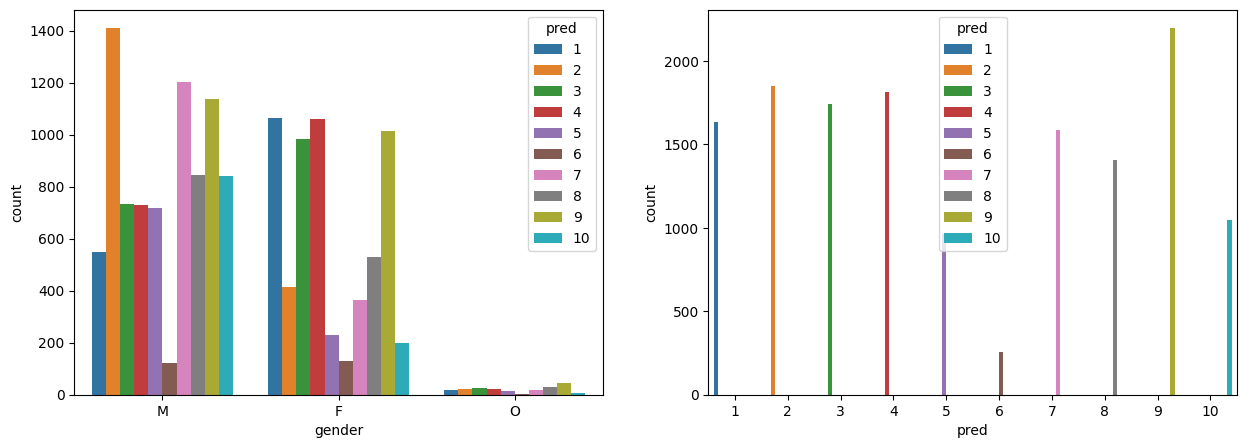

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

subplot_index = 0

for i in ['gender', 'pred']:
    plt.sca(axes[subplot_index])
    sns.countplot(data=results2, x=i, hue="pred")

    subplot_index += 1

plt.show()

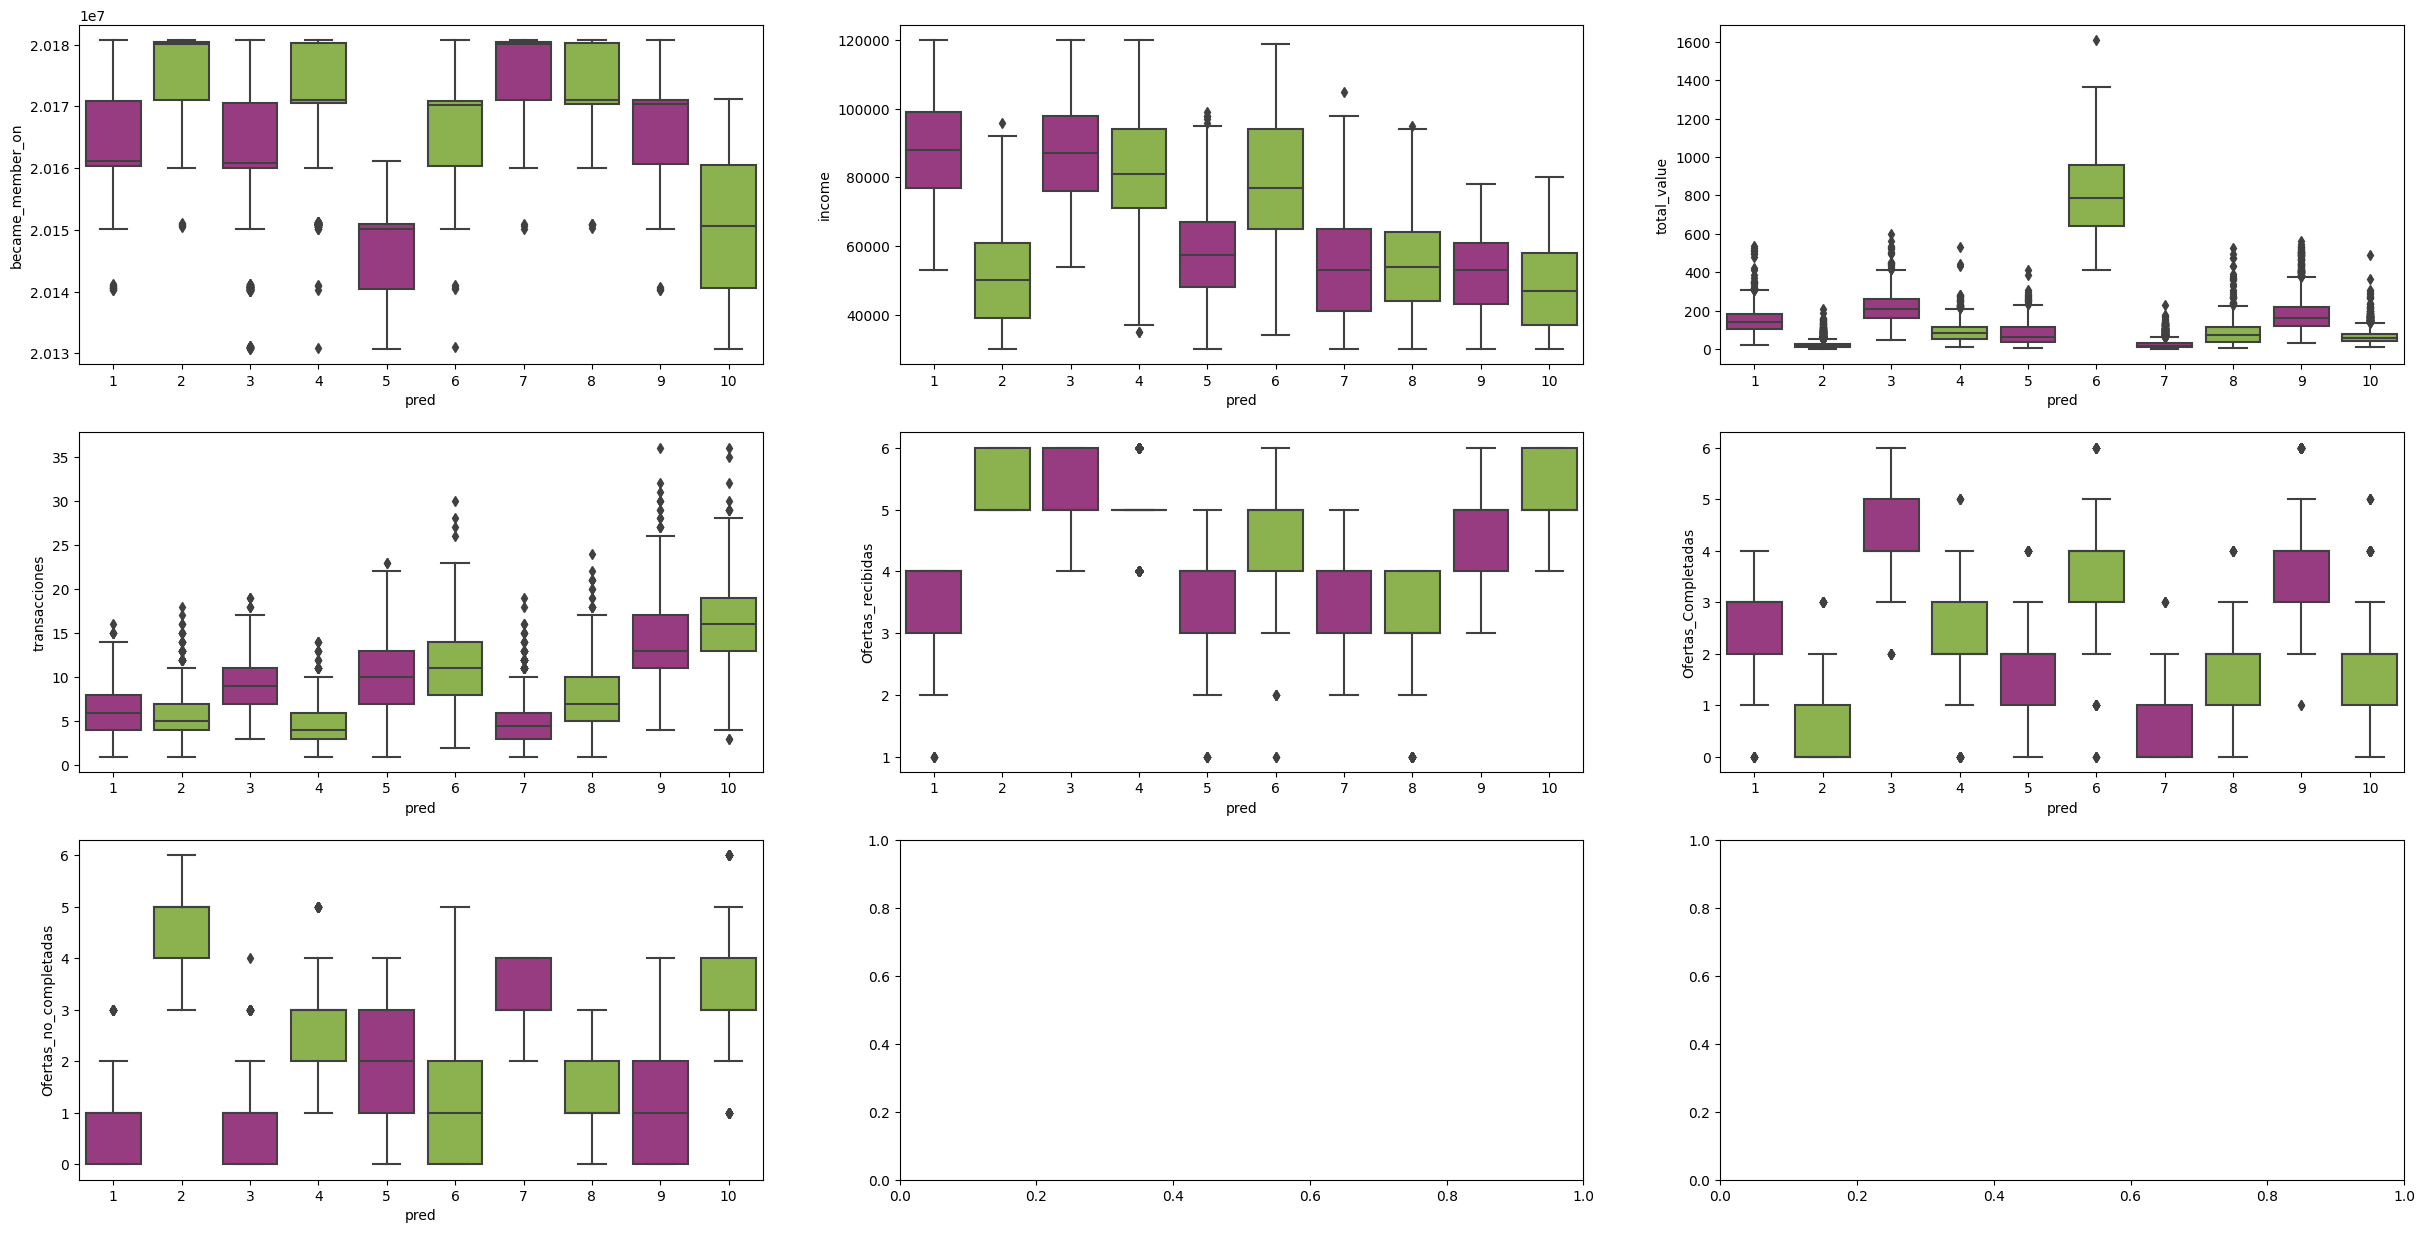

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows = 3, figsize=(30, 15))

columna = 0
fila = 0


for i in V_numericas:
  plt.sca(axes[fila, columna])
  sns.boxplot(results2, x = "pred", y = i, palette = ["#A72D89", "#8FC33E"])
  columna +=1
  if columna == 3:
    fila += 1
    columna = 0

plt.show()

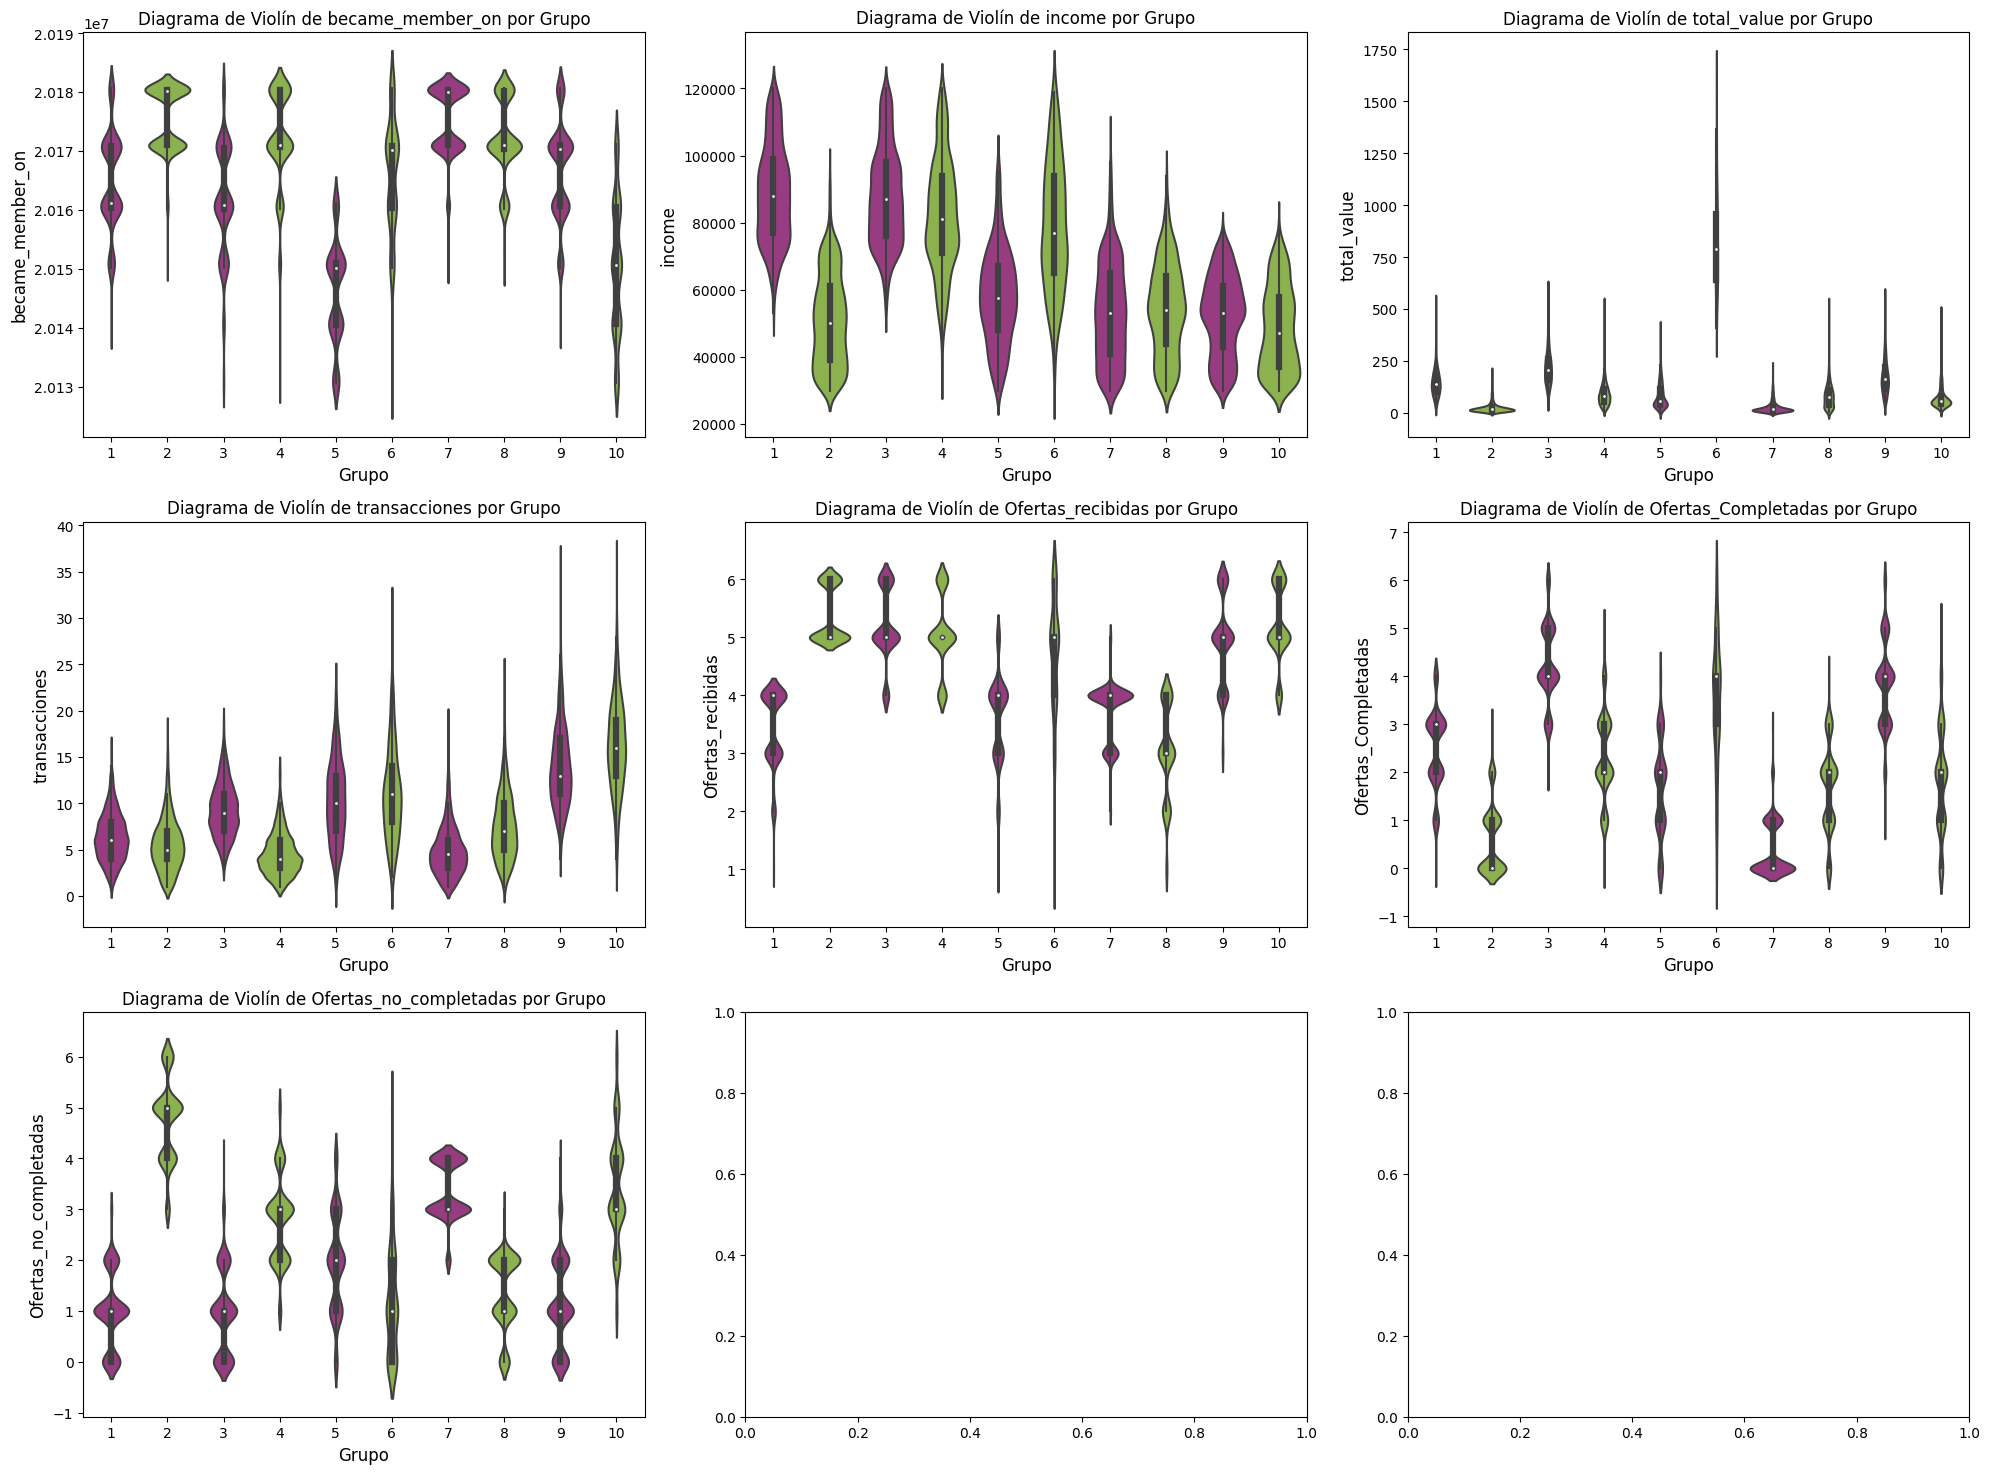

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20, 15))

columna = 0
fila = 0

for i in V_numericas[:]:
    plt.sca(axes[fila, columna])
    sns.violinplot(x="pred", y=i, data=results2, palette=["#A72D89", "#8FC33E"])
    plt.title(f'Diagrama de Violín de {i} por Grupo', fontsize=12)
    plt.xlabel('Grupo', fontsize=12)
    plt.ylabel(i, fontsize=12)

    columna += 1
    if columna == 3:
        fila += 1
        columna = 0

plt.tight_layout()
plt.show()


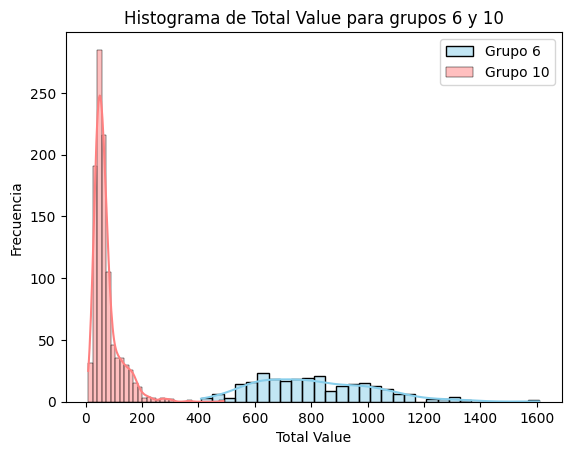

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener solo las filas donde "pred" es igual a 6 o 10
subset_data_6 = results2[results2["pred"] == 6]["total_value"]
subset_data_10 = results2[results2["pred"] == 10]["total_value"]

# Crear un histograma con Seaborn
sns.histplot(subset_data_6, bins=30, kde=True, color="skyblue", label="Grupo 6")
sns.histplot(subset_data_10, bins=30, kde=True, color=(1, 0.5, 0.5), label="Grupo 10")

# Añadir etiquetas y título
plt.xlabel("Total Value")
plt.ylabel("Frecuencia")
plt.title("Histograma de Total Value para grupos 6 y 10")

# Añadir leyenda
plt.legend()

# Mostrar el histograma
plt.show()

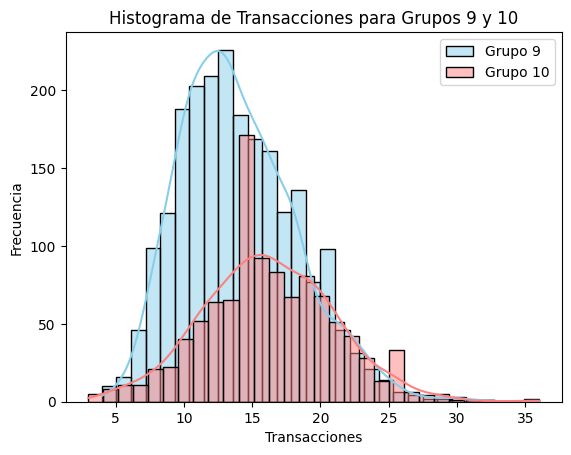

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener solo las filas donde "pred" es igual a 9 o 10
subset_data_9 = results2[results2["pred"] == 9]["transacciones"]
subset_data_10 = results2[results2["pred"] == 10]["transacciones"]

# Crear un histograma con Seaborn
sns.histplot(subset_data_9, bins=30, kde=True, color="skyblue", label="Grupo 9")
sns.histplot(subset_data_10, bins=30, kde=True, color=(1, 0.5, 0.5), label="Grupo 10")

# Añadir etiquetas y título
plt.xlabel("Transacciones")
plt.ylabel("Frecuencia")
plt.title("Histograma de Transacciones para Grupos 9 y 10")

# Añadir leyenda
plt.legend()

# Mostrar el histograma
plt.show()

In [ ]:
from scipy.stats import ttest_ind, shapiro, levene

# Prueba de normalidad (Shapiro-Wilk) para Grupo 9
statistic_9, p_value_9 = shapiro(subset_data_9)
print("Prueba de normalidad para Grupo 9:")
print(f"Estadístico: {statistic_9}, P-valor: {p_value_9}")
if p_value_9 < 0.05:
    print("El valor p es menor que 0.05, lo que sugiere que los datos no siguen una distribución normal.\n")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula de normalidad.\n")

# Prueba de normalidad (Shapiro-Wilk) para Grupo 10
statistic_10, p_value_10 = shapiro(subset_data_10)
print("Prueba de normalidad para Grupo 10:")
print(f"Estadístico: {statistic_10}, P-valor: {p_value_10}")
if p_value_10 < 0.05:
    print("El valor p es menor que 0.05, lo que sugiere que los datos no siguen una distribución normal.\n")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula de normalidad.\n")

# Prueba de homogeneidad de varianzas (Levene)
statistic_levene, p_value_levene = levene(subset_data_9, subset_data_10)
print("Prueba de homogeneidad de varianzas:")
print(f"Estadístico de Levene: {statistic_levene}, P-valor: {p_value_levene}")
if p_value_levene < 0.05:
    print("El valor p es menor que 0.05, lo que sugiere que las varianzas son diferentes.\n")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula de homogeneidad de varianzas.\n")

Prueba de normalidad para Grupo 9:
Estadístico: 0.9695315957069397, P-valor: 3.480147150331273e-21
El valor p es menor que 0.05, lo que sugiere que los datos no siguen una distribución normal.

Prueba de normalidad para Grupo 10:
Estadístico: 0.993445873260498, P-valor: 0.00014459100202657282
El valor p es menor que 0.05, lo que sugiere que los datos no siguen una distribución normal.

Prueba de homogeneidad de varianzas:
Estadístico de Levene: 15.276874609533985, P-valor: 9.47447097534791e-05
El valor p es menor que 0.05, lo que sugiere que las varianzas son diferentes.



In [ ]:
from scipy.stats import mannwhitneyu

# Realizar la prueba de Mann-Whitney U
statistic_mw, p_value_mw = mannwhitneyu(subset_data_9, subset_data_10)

# Imprimir resultados de la prueba de Mann-Whitney U
print("Prueba de Mann-Whitney U para comparar Grupos 9 y 10:")
print(f"Estadístico de Mann-Whitney U: {statistic_mw}, P-valor: {p_value_mw}")

# Interpretar el resultado
if p_value_mw < 0.05:
    print("El valor p es menor que 0.05, lo que sugiere diferencias significativas entre las distribuciones de los grupos.\n")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula de igualdad de distribuciones entre los grupos.\n")


Prueba de Mann-Whitney U para comparar Grupos 9 y 10:
Estadístico de Mann-Whitney U: 818923.5, P-valor: 2.022599609256373e-40
El valor p es menor que 0.05, lo que sugiere diferencias significativas entre las distribuciones de los grupos.



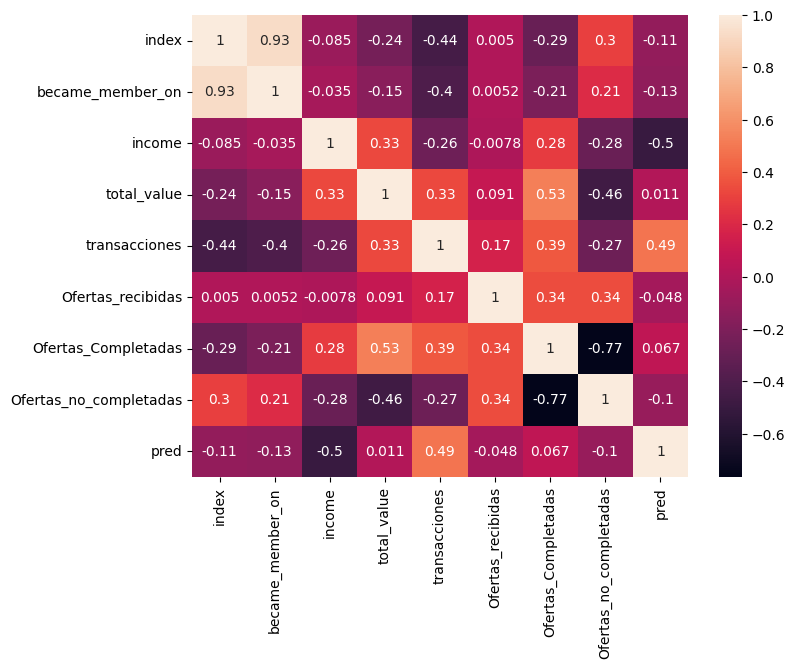

In [ ]:
corr_df =results2.corr(method="pearson", numeric_only = True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()